In [1]:
import string
import numpy as np
import igraph
import pandas as pd
import csv
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
#import sys
#np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', 500)
pd.set_option('display.column_space', 500)
pd.set_option('display.width', 5000)
pd.set_option('display.max_colwidth', -1)



In [2]:
order = ["A", "R", "N", "D", "C", "E", "Q", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"] #RANDOM SAMPLE ORDERING, USE YOUR OWN
#order = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"] #RANDOM SAMPLE ORDERING, USE YOUR OWN


In [3]:
vals= {' ':0} #assign an incremement or decrement to each alphabet letter
id=-((len(order)+1)/2)


type(vals)

dict

In [4]:

for i in order:    
    if id == 0:
        print ("entered this loop")
        vals[" "]=id
        print ("sdfjk",vals)
        id+=1
        print("exiting")
    vals[i]=id
    print (id)
    id+=1
vals


-10.5
-9.5
-8.5
-7.5
-6.5
-5.5
-4.5
-3.5
-2.5
-1.5
-0.5
0.5
1.5
2.5
3.5
4.5
5.5
6.5
7.5
8.5


{' ': 0,
 'A': -10.5,
 'R': -9.5,
 'N': -8.5,
 'D': -7.5,
 'C': -6.5,
 'E': -5.5,
 'Q': -4.5,
 'G': -3.5,
 'H': -2.5,
 'I': -1.5,
 'L': -0.5,
 'K': 0.5,
 'M': 1.5,
 'F': 2.5,
 'P': 3.5,
 'S': 4.5,
 'T': 5.5,
 'W': 6.5,
 'Y': 7.5,
 'V': 8.5}

In [5]:
#extra code

start=0

f = open('data1.csv')
csv_f = csv.reader(f)
with open("dump.txt",'w') as WF:
    for row in csv_f:
        #print (row[1])
        for x in row[1]:
            #print ('x=',x) #printing one letter one by one
            if x in vals:
                    #print (vals[x]) # converting only the capital letters of the word to a number
                    #print (vals[x],"+",start,"=",start+vals[x]) #printing the added values
                    start+=vals[x] #adding the converted numbers
            else:
                    #print (start)
                    #print ("entered else:",start ,"+", vals[" "],"=",start+vals[" "]) # handling encounter of other letters 
                    start+=vals[" "]
            WF.write(str(start)+" ")

#### DATA 1 - Converting to time series

In [6]:
#DATA 1
#using normal array methods
#WORKING 

f = open('data1.csv')
csv_f = csv.reader(f)

a = []
with open('data1_Main_TimeSeries.csv','w',newline='') as cf:  #newline='' lets us write without adding an extra line betweeen rows
    for row[1] in csv_f:
        print (row[1])
        for col in csv_f:
                print (col[1])
                d = []
                
                for x in col[1]:
                    print (x)
                    c = vals[x]
                    a =d.append(c)
                print (d)
                wr = csv.writer(cf,lineterminator='\r')
                wr.writerow(d)

['name', ' sequence', ' source']
DDSSSASGQQQESSVSSQSEASTSSQLG
D
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
S
S
Q
S
E
A
S
T
S
S
Q
L
G
[-7.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGGQQQESSVSSQSDQASTSSQLG
A
D
S
S
S
A
G
G
Q
Q
Q
E
S
S
V
S
S
Q
S
D
Q
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGGQQQESSVSSQSGQASTSSQLG
A
D
S
S
S
A
G
G
Q
Q
Q
E
S
S
V
S
S
Q
S
G
Q
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSASGQQQESSVSSQSEASTSSQLGG
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
S
S
Q
S
E
A
S
T
S
S
Q
L
G
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, 4.5, 5.5, 4

G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, 4.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSASGQQQESSVLSQSDQASTSSQLG
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
D
Q
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGNQQQESSVSSQSDASTSSQLG
A
D
S
S
S
A
G
N
Q
Q
Q
E
S
S
V
S
S
Q
S
D
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -8.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -7.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSASGQQQESSVLSKSGQAGTSSQLG
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
K
S
G
Q
A
G
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, 0.5, 4.5, -3.5, -4.5, -10.5, -3.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ANSSSASGQQQESSVLSQSDQASTSSQLG
A
N
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
D
Q
A
S
T
S
S
Q


S
G
A
R
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -2.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -10.5, -9.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSAGDQQESSVSSQSGASTSSQLG
A
D
S
S
S
A
G
D
Q
Q
E
S
S
V
S
S
Q
S
G
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASGQPQESSVLCVSDLSSTSSQLG
T
D
S
S
S
A
S
G
Q
P
Q
E
S
S
V
L
C
V
S
D
L
S
S
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, 3.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, -6.5, 8.5, 4.5, -7.5, -0.5, 4.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSAGDQQQESSVSSQSGQASTSSQLG
T
D
S
S
S
A
G
D
Q
Q
Q
E
S
S
V
S
S
Q
S
G
Q
A
S
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
ADSSSASGQQQESSVLSQSDLSSTWSQLG
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
D
L
S
S
T
W
S
Q
L
G


K
E
S
N
V
S
S
Q
T
G
Q
A
S
P
S
S
H
L
R
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, 0.5, -5.5, 4.5, -8.5, 8.5, 4.5, 4.5, -4.5, 5.5, -3.5, -4.5, -10.5, 4.5, 3.5, 4.5, 4.5, -2.5, -0.5, -9.5]
TDSSSAGDQQQGSGVSAQSGQASPWSQLG
T
D
S
S
S
A
G
D
Q
Q
Q
G
S
G
V
S
A
Q
S
G
Q
A
S
P
W
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -4.5, -3.5, 4.5, -3.5, 8.5, 4.5, -10.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 3.5, 6.5, 4.5, -4.5, -0.5, -3.5]
ADSSSASGRHQKSNVSSQSEACTSSQLG
A
D
S
S
S
A
S
G
R
H
Q
K
S
N
V
S
S
Q
S
E
A
C
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -9.5, -2.5, -4.5, 0.5, 4.5, -8.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, -6.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASGQWCESSVSSQSEASTSSQLG
T
D
S
S
S
A
S
G
Q
W
C
E
S
S
V
S
S
Q
S
E
A
S
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, 6.5, -6.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -5.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASGQQQESSVSSQSEASTSSQLR
T
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V


S
S
S
A
G
D
Q
Q
Q
E
S
S
V
S
S
Q
S
G
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -7.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASGQQQESSVSSQSDASTSSQ
T
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
S
S
Q
S
D
A
S
T
S
S
Q
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -7.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5]
ADSSSASGQQQESSVLSQSGASTSSQLG
A
D
S
S
S
A
S
G
Q
Q
Q
E
S
S
V
L
S
Q
S
G
A
S
T
S
S
Q
L
G
[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -3.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASSQQQESSVLSQSDQASTSSQLG
T
D
S
S
S
A
S
S
Q
Q
Q
E
S
S
V
L
S
Q
S
D
Q
A
S
T
S
S
Q
L
G
[5.5, -7.5, 4.5, 4.5, 4.5, -10.5, 4.5, 4.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, -0.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
TDSSSASGQQQGSSVSSQSGQASTSSQLG
T
D
S
S
S
A
S
G
Q
Q
Q
G
S
S
V
S
S
Q
S
G
Q


#### DATA 2 - Converting to timeseries 

In [7]:
# DATA 2
#using normal array methods
#WORKING 

f = open('data2.csv')
csv_f = csv.reader(f)
a = []
with open('data2_Main_timeSeries.csv','w',newline='') as cf:  #newline='' lets us write without adding an extra line betweeen rows
    for row[1] in csv_f:
        print (row[1])
        for col in csv_f:
                print (col[1])
                d = []
                
                for x in col[1]:
                    print (x)
                    c = vals[x]
                    a =d.append(c)
                print (d)
                wr = csv.writer(cf)
                wr.writerow(d)                          


['ID', 'Sequence']
WKQENGMWYFYNTDGSM ATG
W
K
Q
E
N
G
M
W
Y
F
Y
N
T
D
G
S
M
 
A
T
G
[6.5, 0.5, -4.5, -5.5, -8.5, -3.5, 1.5, 6.5, 7.5, 2.5, 7.5, -8.5, 5.5, -7.5, -3.5, 4.5, 1.5, 0, -10.5, 5.5, -3.5]
WLQNNGSWYYLNANGSM ATG
W
L
Q
N
N
G
S
W
Y
Y
L
N
A
N
G
S
M
 
A
T
G
[6.5, -0.5, -4.5, -8.5, -8.5, -3.5, 4.5, 6.5, 7.5, 7.5, -0.5, -8.5, -10.5, -8.5, -3.5, 4.5, 1.5, 0, -10.5, 5.5, -3.5]
WVKDGDTWYYLEASGAMKASQ
W
V
K
D
G
D
T
W
Y
Y
L
E
A
S
G
A
M
K
A
S
Q
[6.5, 8.5, 0.5, -7.5, -3.5, -7.5, 5.5, 6.5, 7.5, 7.5, -0.5, -5.5, -10.5, 4.5, -3.5, -10.5, 1.5, 0.5, -10.5, 4.5, -4.5]
WFKVSDKWYYVNSNGAM ATG
W
F
K
V
S
D
K
W
Y
Y
V
N
S
N
G
A
M
 
A
T
G
[6.5, 2.5, 0.5, 8.5, 4.5, -7.5, 0.5, 6.5, 7.5, 7.5, 8.5, -8.5, 4.5, -8.5, -3.5, -10.5, 1.5, 0, -10.5, 5.5, -3.5]
WLQYNGSWYYLNSNGAM ATG
W
L
Q
Y
N
G
S
W
Y
Y
L
N
S
N
G
A
M
 
A
T
G
[6.5, -0.5, -4.5, 7.5, -8.5, -3.5, 4.5, 6.5, 7.5, 7.5, -0.5, -8.5, 4.5, -8.5, -3.5, -10.5, 1.5, 0, -10.5, 5.5, -3.5]
WAKVNGSWYYLNANGSM ATG
W
A
K
V
N
G
S
W
Y
Y
L
N
A
N
G
S
M
 
A
T
G
[6.5, -10.5, 0.5

##### (additional work) Placing values in one list and plotting (DATA 1)

In [8]:
#placing all the values in one list mlist[0:]
# using this for plotting 
#data1
length = 0
mlist = []
for line in open("data1_Main_timeSeries.csv"):
        reader_file = csv.reader(open("data1_Main_timeSeries.csv"))
        length_of_file = len(list(reader_file))
        x = line.split(',')
        y = []
        for i in range(len(x)):
            y.append(float(x[i]))
            mlist.append(float(x[i]))
        #mlist.append(y)
        length = max(length, len(y))


print(length)

31


(-50, 50)

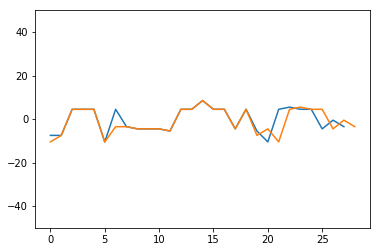

In [9]:
plt.plot(mlist[:28]) #first sequence
plt.plot(mlist[28:57]) # second sequence 
plt.ylim(-50, 50)

#### DATA 1 - converting list of lists to array to lists & plotting

In [10]:
#data1
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)
#main
#plotting using arr[index]
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)

length = 0
mlist1 = []
for line in open("data1_Main_timeSeries.csv"):
        reader_file = csv.reader(open("data1_Main_timeSeries.csv"))
        length_of_file = len(list(reader_file))
        x = line.split(',')
        y = []
        for i in range(len(x)):
            y.append(float(x[i]))
            #mlist.append(float(x[i]))
        mlist1.append(y)
        length = max(length, len(y))
        arr = np.array(mlist1)
        
        
length
#mlist1
        
print(arr[1])
print("\n")        
print(arr[2])
#print(type(mlist1[0][4]))
#print (type(arr[0]))
#print (type(arr[0][1]))
#print (len(arr))
#print (arr[1])

for i in range(1,234):
    print("a[",i,"]")
    print(len(mlist1[i]))

[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -7.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]


[-10.5, -7.5, 4.5, 4.5, 4.5, -10.5, -3.5, -3.5, -4.5, -4.5, -4.5, -5.5, 4.5, 4.5, 8.5, 4.5, 4.5, -4.5, 4.5, -3.5, -4.5, -10.5, 4.5, 5.5, 4.5, 4.5, -4.5, -0.5, -3.5]
a[ 1 ]
29
a[ 2 ]
29
a[ 3 ]
29
a[ 4 ]
28
a[ 5 ]
29
a[ 6 ]
29
a[ 7 ]
29
a[ 8 ]
29
a[ 9 ]
29
a[ 10 ]
28
a[ 11 ]
23
a[ 12 ]
29
a[ 13 ]
28
a[ 14 ]
29
a[ 15 ]
29
a[ 16 ]
29
a[ 17 ]
28
a[ 18 ]
29
a[ 19 ]
28
a[ 20 ]
28
a[ 21 ]
28
a[ 22 ]
28
a[ 23 ]
29
a[ 24 ]
29
a[ 25 ]
29
a[ 26 ]
29
a[ 27 ]
29
a[ 28 ]
25
a[ 29 ]
29
a[ 30 ]
29
a[ 31 ]
29
a[ 32 ]
29
a[ 33 ]
29
a[ 34 ]
28
a[ 35 ]
29
a[ 36 ]
29
a[ 37 ]
29
a[ 38 ]
29
a[ 39 ]
29
a[ 40 ]
28
a[ 41 ]
29
a[ 42 ]
31
a[ 43 ]
29
a[ 44 ]
28
a[ 45 ]
29
a[ 46 ]
29
a[ 47 ]
29
a[ 48 ]
29
a[ 49 ]
29
a[ 50 ]
29
a[ 51 ]
29
a[ 52 ]
29
a[ 53 ]
29
a[ 54 ]
29
a[ 55 ]
29
a[ 56 ]
29
a[ 57 ]
29
a[ 58 ]
29
a[ 59 ]
29
a[ 60 ]
29
a[ 61 ]
29
a[ 62 

(-15, 15)

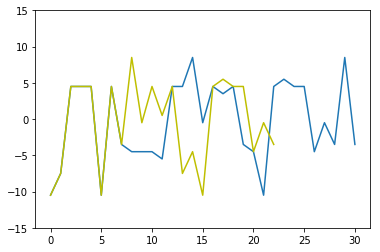

In [11]:
plt.plot(arr[42]) #first sequence
plt.plot(arr[199],'y') # second sequence 
plt.ylim(-15,15)

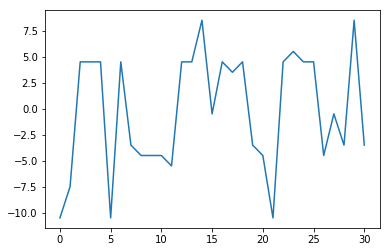

In [12]:
plt.plot(arr[42]) # 23 elements 


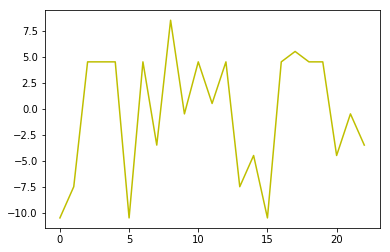

In [13]:
plt.plot(arr[199],'y') #31 elements

(-15, 15)

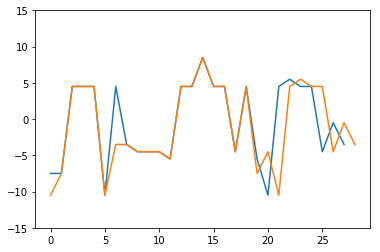

In [14]:
plt.plot(arr[0]) #first sequence
plt.plot(arr[1]) # second sequence 
plt.ylim(-15,15)

#### DATA 1 Padding

In [15]:
#padding 0s at the end of the arrays
arr_of_arr= []
li_padded = []
for i in range(0,len(arr)):
    abc = np.array(mlist1[i])
    a_padded = np.pad(abc,(0,length-len(mlist1[i])),'constant')
    #a_stack = np.stack(a_padded, axis=0)
    #arr_of_arr = np.append(arr_of_arr,a_padded,axis = 0) # contains a 1D array with all the values.
    #ar_splited = np.split(arr_of_arr,[length]*i)
    li_padded.append(a_padded)

    
print ((li_padded))    
#print (arr_of_arr[0:length+length])
#print(len(a_padded))

[array([ -7.5,  -7.5,   4.5,   4.5,   4.5, -10.5,   4.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -5.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,  -0.5,
        -3.5,   0. ,   0. ,   0. ]), array([-10.5,  -7.5,   4.5,   4.5,   4.5, -10.5,  -3.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -7.5,  -4.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,
        -0.5,  -3.5,   0. ,   0. ]), array([-10.5,  -7.5,   4.5,   4.5,   4.5, -10.5,  -3.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -3.5,  -4.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,
        -0.5,  -3.5,   0. ,   0. ]), array([-10.5,  -7.5,   4.5,   4.5,   4.5, -10.5,   4.5,  -3.5,  -4.5,
        -4.5,  -4.5,  -5.5,   4.5,   4.5,   8.5,   4.5,   4.5,  -4.5,
         4.5,  -5.5, -10.5,   4.5,   5.5,   4.5,   4.5,  -4.5,  -0.5,
        -3.5,  -3.5,   0. ,   0. ]), array([-10.

##### DATA 2 converting "list of lists" to "array of lists"

In [16]:
#placing the values in a 2D list 
# can create an array of lists by np.array(mlist1)
#main
#plotting using arr[index]

length2 = 0
mlist2 = []
for line in open("data2_Main_timeSeries.csv"):
        reader_file2 = csv.reader(open("data2_Main_timeSeries.csv"))
        length_of_file2 = len(list(reader_file2))
        x2 = line.split(',')
        y2 = []
        for i in range(len(x2)):
            y2.append(float(x2[i]))
            #mlist.append(float(x[i]))
        mlist2.append(y2)
        length2 = max(length2, len(y2))
        arr2 = np.array(mlist2)
        #print (len(mlist2))

#print (mlist2[0])
print(arr2[20])
print("\n")        
print(arr2[2])
#print(type(mlist1[0][4]))
#print (type(arr[0]))
#print (type(arr[0][1]))
#print (len(arr))
#print (arr[1])

len(mlist2[1])

[  6.5   8.5   0.5  -7.5  -3.5  -7.5   5.5   6.5   7.5   7.5  -0.5  -5.5
 -10.5   4.5  -3.5 -10.5   1.5   0.5 -10.5  -8.5  -4.5]


[  6.5   8.5   0.5  -7.5  -3.5  -7.5   5.5   6.5   7.5   7.5  -0.5  -5.5
 -10.5   4.5  -3.5 -10.5   1.5   0.5 -10.5   4.5  -4.5]


21

In [17]:
#padding 0s at the end of the arrays (padding  for dataset 2 is not required, but i still it did it anyway ¯\_(ツ)_/¯ )
# 0 values are spaces
arr_of_arr2= []
li_padded2 = []
for i in range(0,len(arr2)):
    abc2 = np.array(mlist2[i])
    a_padded2 = np.pad(abc2,(0,length2-len(mlist2[i])),'constant')
    #a_stack = np.stack(a_padded, axis=0)
    #arr_of_arr = np.append(arr_of_arr,a_padded,axis = 0) # contains a 1D array with all the values.
    #ar_splited = np.split(arr_of_arr,[length]*i)
    li_padded2.append(a_padded2)

    
print ((li_padded2[2]))  #this is silimar to element[14]
print ((li_padded2[12]))
#print (arr_of_arr[0:length+length])
#print(len(a_padded))

[  6.5   8.5   0.5  -7.5  -3.5  -7.5   5.5   6.5   7.5   7.5  -0.5  -5.5
 -10.5   4.5  -3.5 -10.5   1.5   0.5 -10.5   4.5  -4.5]
[  6.5   8.5   0.5  -7.5  -3.5  -5.5   5.5   6.5   7.5   7.5  -0.5  -5.5
 -10.5   4.5  -3.5   4.5   1.5   0.5 -10.5  -8.5  -4.5]


# DISTANCE 

#### Fast Dynamic time warping 

In [18]:
#data1
print (li_padded[42]) #31
print (li_padded[199]) #199
distance, path = fastdtw(li_padded[42],li_padded[199],dist=euclidean)
print (distance)

[-10.5  -7.5   4.5   4.5   4.5 -10.5   4.5  -3.5  -4.5  -4.5  -4.5  -5.5
   4.5   4.5   8.5  -0.5   4.5   3.5   4.5  -3.5  -4.5 -10.5   4.5   5.5
   4.5   4.5  -4.5  -0.5  -3.5   8.5  -3.5]
[-10.5  -7.5   4.5   4.5   4.5 -10.5   4.5  -3.5   8.5  -0.5   4.5   0.5
   4.5  -7.5  -4.5 -10.5   4.5   5.5   4.5   4.5  -4.5  -0.5  -3.5   0.
   0.    0.    0.    0.    0.    0.    0. ]
41.0


In [19]:
#data1
#changes from G to D 
distance, path = fastdtw(li_padded[2],li_padded[1],dist=euclidean)
print (distance)

4.0


In [20]:
#data2
distance2, path2 = fastdtw(li_padded2[0],li_padded2[14],dist=euclidean)
print (distance2)

7.0


In [21]:
#data2
distance2, path2 = fastdtw(li_padded2[2],li_padded2[12],dist=euclidean)
print (distance2)

23.0


In [168]:
%%time
len(li_padded)
#type(li_padded2[current_row])


Wall time: 0 ns


234

In [169]:
%%time
# EUCL distance for all seqs
current_row=0
compare_row=0
data_arr = []
while current_row <= len(li_padded)-1:
    #array1= li_padded2[current_row]
    print("current_row",current_row)
    dist_values = []
    while compare_row <= len(li_padded)-1:
        #array2 = li_padded2[compare_row]
        distance,path = fastdtw(li_padded[current_row],li_padded[compare_row],dist=euclidean)
        print(distance)
        dist_values.append(distance)
        compare_row=compare_row+1        
    data_arr.append(dist_values)
    compare_row=0    
    current_row=current_row+1
    print("increment current row")
        
        #print(dist_values)
        #distance_dataframe = pd.DataFrame(data=dist_values)
        

current_row 0
0.0
14.0
14.0
3.0
3.0
16.0
8.0
21.0
3.0
19.0
25.0
78.5
37.0
15.0
9.0
17.0
22.0
11.0
29.0
13.0
5.0
5.0
15.0
18.0
21.0
6.0
11.0
16.0
35.0
47.0
6.0
25.5
18.0
3.0
14.0
27.0
31.0
17.0
11.0
21.0
10.0
19.0
34.5
15.0
20.0
19.0
19.0
24.0
35.0
30.0
22.0
26.5
24.0
31.5
24.0
20.0
20.0
14.0
24.0
17.0
21.0
26.0
9.0
11.0
17.0
24.0
12.0
29.0
4.0
26.0
16.0
21.0
14.0
27.0
17.0
28.0
22.0
22.0
35.0
15.0
34.0
23.0
30.0
19.0
24.0
48.5
41.0
42.0
42.0
20.0
30.0
17.0
29.0
8.0
18.0
29.0
29.0
30.5
24.0
29.0
20.0
26.0
26.0
15.0
15.0
8.0
32.0
23.0
17.0
22.0
45.0
30.0
16.0
46.0
27.0
19.0
34.0
17.0
29.0
31.0
19.0
27.0
33.0
15.0
22.0
24.0
32.5
34.5
21.0
10.0
34.0
8.0
86.0
29.0
19.0
19.0
13.0
16.0
23.0
21.0
16.0
79.5
27.0
25.0
37.0
26.0
25.0
38.0
39.0
16.0
25.0
20.0
24.0
25.5
32.0
32.0
33.0
26.0
28.0
43.0
46.0
45.0
33.0
25.0
19.0
45.0
34.5
61.0
49.0
9.0
11.0
4.0
9.0
25.0
35.0
31.0
28.0
17.0
25.0
15.0
35.0
53.0
30.0
42.0
12.0
27.0
35.0
16.0
12.0
20.0
23.0
18.0
5.0
15.0
10.0
40.0
16.0
16.0
25.0
77.5
30.0
2

17.0
53.0
26.5
40.5
42.0
28.0
28.0
30.0
41.5
34.0
26.0
40.0
increment current row
current_row 7
21.0
33.0
29.0
24.0
24.0
5.0
13.0
0.0
18.0
38.0
32.0
94.5
26.0
12.0
24.0
26.0
41.0
32.0
18.0
8.0
28.0
26.0
10.0
37.0
40.0
21.0
16.0
9.0
30.0
26.0
25.0
39.5
37.0
22.0
33.0
6.0
23.0
6.0
26.0
10.0
23.0
34.0
45.0
34.0
11.0
34.0
34.0
13.0
50.0
45.0
37.0
36.5
16.0
41.5
39.0
35.0
9.0
32.0
13.0
36.0
14.0
9.0
27.0
30.0
40.0
39.0
31.0
8.0
25.0
5.0
21.0
40.0
33.0
6.0
22.0
7.0
15.0
11.0
24.0
30.0
49.0
20.0
45.0
11.0
29.0
33.0
30.0
31.0
31.0
17.0
19.0
32.0
34.0
27.0
19.0
18.0
20.0
20.5
19.0
14.0
37.0
17.0
23.0
30.0
36.0
29.0
29.0
12.0
32.0
39.0
36.0
21.0
33.0
43.0
16.0
42.0
13.0
34.0
46.0
22.0
34.0
16.0
51.0
34.0
11.0
42.0
43.0
45.0
42.0
31.0
45.0
29.0
106.0
18.0
38.0
38.0
28.0
31.0
20.0
36.0
37.0
95.5
42.0
40.0
20.0
19.0
18.0
29.0
28.0
13.0
48.0
39.0
43.0
15.5
25.0
15.0
16.0
19.0
11.0
36.0
61.0
34.0
54.0
20.0
14.0
52.5
46.5
72.5
60.5
30.0
32.0
25.0
30.0
40.0
24.0
10.0
20.0
22.0
35.0
36.0
26.0
43.0
21.0


29.0
16.0
92.5
47.0
13.0
34.0
21.0
17.0
16.0
38.0
42.0
34.0
59.5
32.0
27.0
27.0
18.0
29.0
13.0
40.0
31.0
4.0
25.0
9.0
9.0
28.0
44.5
35.0
49.0
33.5
17.0
35.0
31.0
50.0
33.0
23.0
19.0
increment current row
current_row 14
9.0
15.0
11.0
6.0
6.0
19.0
11.0
24.0
6.0
20.0
24.0
72.5
40.0
26.0
0.0
14.0
23.0
14.0
32.0
22.0
10.0
8.0
24.0
19.0
22.0
3.0
8.0
23.0
42.0
50.0
7.0
26.5
19.0
10.0
15.0
30.0
35.0
20.0
8.0
24.0
15.0
16.0
28.0
16.0
25.0
16.0
16.0
27.0
32.0
27.0
19.0
23.5
30.0
28.5
21.0
17.0
24.0
14.0
27.0
18.0
28.0
33.0
9.0
12.0
22.0
21.0
13.0
32.0
7.0
29.0
13.0
22.0
15.0
30.0
14.0
32.0
29.0
25.0
38.0
12.0
31.0
34.0
27.0
25.0
21.0
48.0
44.0
45.0
45.0
31.0
33.0
14.0
26.0
15.0
21.0
32.0
34.0
37.5
33.0
38.0
19.0
31.0
37.0
12.0
18.0
11.0
43.0
26.0
14.0
21.0
50.0
35.0
15.0
51.0
30.0
24.0
37.0
16.0
28.0
36.0
16.0
24.0
33.0
16.0
25.0
24.0
30.0
28.0
24.0
13.0
37.0
11.0
90.0
32.0
20.0
20.0
10.0
13.0
34.0
18.0
20.0
73.5
21.0
22.0
44.0
33.0
32.0
41.0
40.0
27.0
30.0
21.0
25.0
34.5
37.0
37.0
40.0
33.0
33.

30.0
38.0
13.0
13.0
21.0
26.0
13.0
4.0
12.0
7.0
43.0
15.0
13.0
32.0
76.5
31.0
29.0
18.0
37.0
33.0
32.0
22.0
26.0
50.0
43.5
16.0
11.0
11.0
34.0
13.0
29.0
24.0
15.0
20.0
9.0
25.0
25.0
12.0
60.5
19.0
33.0
49.5
33.0
19.0
15.0
34.0
49.0
39.0
35.0
increment current row
current_row 21
5.0
13.0
13.0
2.0
2.0
21.0
13.0
26.0
8.0
18.0
24.0
77.5
42.0
20.0
8.0
16.0
21.0
10.0
30.0
18.0
4.0
0.0
16.0
17.0
20.0
5.0
10.0
21.0
40.0
52.0
5.0
24.5
17.0
8.0
13.0
32.0
35.0
22.0
10.0
26.0
9.0
14.0
29.5
14.0
25.0
18.0
18.0
29.0
34.0
29.0
21.0
21.5
29.0
30.5
23.0
19.0
25.0
13.0
29.0
16.0
26.0
31.0
8.0
10.0
16.0
19.0
11.0
34.0
3.0
31.0
15.0
20.0
13.0
32.0
16.0
33.0
27.0
27.0
40.0
14.0
33.0
28.0
29.0
24.0
19.0
49.5
46.0
47.0
47.0
25.0
31.0
16.0
28.0
13.0
23.0
34.0
30.0
35.5
29.0
34.0
19.0
31.0
31.0
14.0
14.0
7.0
37.0
28.0
16.0
21.0
50.0
35.0
15.0
51.0
32.0
18.0
39.0
16.0
28.0
32.0
18.0
32.0
32.0
14.0
27.0
23.0
31.5
33.5
16.0
9.0
33.0
7.0
53.0
34.0
18.0
18.0
12.0
15.0
28.0
20.0
15.0
77.5
22.0
24.0
42.0
31.0
30.0
43

30.0
43.0
52.0
72.0
36.0
31.0
52.0
36.0
33.0
52.0
47.0
39.0
59.5
34.0
48.5
41.0
45.0
29.0
48.0
17.0
30.0
26.0
31.0
43.0
40.0
34.0
57.0
41.0
38.0
39.0
35.0
49.0
26.0
28.0
36.0
50.0
37.0
27.0
31.0
28.0
48.0
55.0
32.0
47.0
29.0
57.0
66.0
38.0
35.0
35.0
29.0
39.0
34.0
46.0
37.0
27.0
22.0
40.0
41.5
35.0
40.0
43.0
21.0
19.0
40.0
26.0
43.0
25.0
32.0
54.0
45.0
39.0
25.0
35.0
55.0
20.0
52.0
43.0
36.0
52.0
26.0
52.0
36.0
46.0
28.0
31.0
58.0
70.0
72.0
40.0
45.0
55.0
43.0
103.5
38.0
24.0
32.0
46.0
49.0
16.0
42.0
51.0
58.0
60.0
58.0
42.0
31.0
30.0
33.0
32.0
25.0
34.0
49.0
53.0
32.5
37.0
37.0
38.0
31.0
33.0
50.0
63.0
38.0
68.0
36.0
30.0
76.0
69.5
76.0
66.5
44.0
46.0
39.0
44.0
58.0
44.0
40.0
38.0
50.0
35.0
34.0
30.0
44.0
25.0
37.0
41.0
32.0
34.0
45.0
45.0
37.0
28.0
44.0
40.0
50.0
41.0
29.0
61.0
49.0
34.0
58.0
47.0
31.0
50.0
39.0
35.0
34.0
46.0
42.0
36.0
78.0
48.0
47.0
33.0
36.0
45.0
31.0
25.0
35.0
28.0
45.0
34.0
27.0
32.0
53.0
58.5
72.5
58.0
35.0
31.0
41.0
69.5
35.0
43.0
43.0
increment current row
cu

31.0
45.5
43.0
28.0
39.0
0.0
29.0
12.0
32.0
16.0
29.0
40.0
51.0
40.0
17.0
40.0
40.0
19.0
56.0
51.0
43.0
42.5
22.0
47.5
45.0
41.0
15.0
38.0
19.0
42.0
20.0
15.0
33.0
36.0
46.0
45.0
37.0
14.0
31.0
11.0
27.0
46.0
39.0
12.0
28.0
13.0
21.0
17.0
30.0
36.0
55.0
26.0
51.0
17.0
35.0
39.0
36.0
37.0
37.0
23.0
25.0
38.0
40.0
33.0
25.0
24.0
26.0
26.5
25.0
20.0
43.0
23.0
29.0
36.0
45.5
38.5
23.0
18.0
38.0
45.0
42.0
27.0
39.0
49.0
22.0
48.0
19.0
40.0
52.0
28.0
28.0
22.0
57.0
40.0
5.0
36.0
49.0
51.0
51.5
40.5
42.5
35.0
73.5
24.0
44.0
44.0
34.0
37.0
26.0
42.0
43.0
101.5
48.0
46.0
14.0
25.0
24.0
35.0
34.0
19.0
54.0
45.0
49.0
21.5
31.0
21.0
22.0
25.0
17.0
42.0
55.0
40.0
60.0
26.0
8.0
58.5
52.5
78.5
66.5
27.5
41.5
34.5
39.5
34.0
18.0
16.0
26.0
28.0
41.0
42.0
32.0
37.0
27.0
39.0
37.0
14.0
24.0
31.0
33.0
41.0
22.0
44.0
32.0
42.0
37.0
29.0
29.0
41.0
20.0
99.5
51.0
25.0
45.0
25.0
28.0
27.0
49.0
46.0
38.0
66.5
36.0
39.0
45.0
29.0
40.0
24.0
44.0
39.0
21.0
33.0
21.0
13.0
36.0
46.0
45.5
59.5
35.0
21.0
50.5
49.0
60

29.5
45.5
41.0
44.0
25.0
29.0
45.0
72.0
58.0
29.0
39.0
41.0
32.0
40.5
51.0
33.0
41.0
20.0
36.0
37.5
12.0
0.0
28.0
40.5
28.0
38.0
47.0
44.0
39.0
31.0
14.0
42.0
35.0
33.0
29.0
45.0
26.0
49.0
40.0
40.0
44.0
21.0
24.0
45.5
23.0
25.0
53.0
30.5
40.0
24.0
44.0
27.0
41.0
25.0
52.0
41.0
37.0
58.0
32.0
43.0
55.5
39.0
37.0
16.0
20.0
64.0
65.0
65.0
54.5
29.0
36.0
37.0
27.0
42.0
54.0
30.0
53.5
45.0
49.0
44.5
56.5
60.5
24.0
40.0
23.0
66.5
38.0
26.0
46.5
65.5
60.5
44.0
62.0
52.0
32.0
48.0
41.5
53.5
51.5
28.0
42.0
46.0
38.0
47.0
36.0
2.0
16.0
42.0
25.0
52.0
26.5
56.0
44.0
42.0
42.0
22.0
25.0
57.5
40.0
40.5
43.0
20.0
34.0
55.0
45.0
44.0
63.0
62.0
50.5
50.0
43.0
37.0
51.0
51.0
50.0
49.0
45.0
46.0
47.0
63.0
70.0
59.5
59.5
53.5
38.5
70.0
85.0
52.0
34.0
34.0
29.0
32.0
34.0
50.0
45.0
46.0
31.0
43.0
43.5
65.5
82.5
52.5
62.5
25.0
46.0
59.0
28.0
21.0
39.0
42.0
35.5
31.5
30.0
25.0
67.5
39.0
29.0
40.0
41.0
47.0
45.0
19.0
45.0
34.0
33.0
23.0
42.0
66.0
58.5
24.0
36.5
44.5
50.0
29.0
45.0
42.0
40.5
50.5
24.5
41.0
43

35.0
32.0
15.0
27.0
35.0
27.0
41.0
23.0
21.0
46.0
19.0
41.0
23.0
29.0
24.0
44.0
22.0
48.0
27.0
25.0
25.0
21.0
24.0
39.0
17.0
15.0
34.0
31.0
17.0
49.0
44.0
43.0
26.0
25.0
48.0
35.0
42.0
36.0
55.5
49.0
49.0
51.0
44.0
46.0
45.0
26.0
31.0
35.0
54.0
49.0
66.5
58.5
61.0
57.0
33.0
23.0
28.0
21.0
17.0
33.0
45.0
45.0
31.0
26.0
17.0
39.0
56.0
34.0
46.0
24.0
45.0
53.0
28.0
20.0
16.0
41.0
31.0
27.0
29.0
24.0
59.0
38.0
28.0
39.0
104.5
7.0
44.0
32.0
28.0
47.0
46.0
36.0
5.0
29.0
64.5
16.0
18.0
20.0
44.0
28.0
44.0
19.0
14.0
51.0
20.0
47.0
42.0
17.0
44.0
44.5
53.5
55.0
34.0
18.0
24.0
45.5
28.0
48.0
50.0
increment current row
current_row 50
22.0
12.0
8.0
19.0
19.0
32.0
24.0
37.0
19.0
17.0
15.0
96.5
29.0
39.0
19.0
11.0
18.0
11.0
35.0
35.0
23.0
21.0
37.0
16.0
18.0
16.0
21.0
36.0
39.0
53.0
20.0
23.5
16.0
23.0
12.0
43.0
38.0
33.0
11.0
27.0
28.0
19.0
31.0
19.0
28.0
19.0
7.0
38.0
10.0
8.0
0.0
26.5
33.0
9.5
2.0
20.0
29.0
17.0
24.0
9.0
31.0
36.0
12.0
15.0
13.0
24.0
16.0
45.0
18.0
32.0
16.0
13.0
18.0
33.0
17.0
3

31.0
33.0
28.0
18.0
35.0
13.0
25.0
30.0
19.0
27.0
34.0
26.0
27.0
15.0
37.0
25.0
35.0
30.0
31.0
36.0
34.0
13.0
47.0
34.0
18.0
38.0
18.0
21.0
20.0
42.0
32.0
24.0
60.5
21.0
32.0
31.0
23.0
34.0
18.0
30.0
25.0
15.0
26.0
12.0
6.0
29.0
33.0
39.5
147.5
29.0
14.0
40.0
35.0
54.5
23.0
22.0
26.0
increment current row
current_row 57
14.0
21.0
19.0
11.0
11.0
27.0
19.0
32.0
14.0
26.0
31.0
16.0
43.0
29.0
14.0
22.0
27.0
19.0
30.0
27.0
13.0
13.0
29.0
25.0
28.0
11.0
16.0
29.0
48.0
48.0
13.0
32.5
25.0
16.0
21.0
38.0
35.0
28.0
6.0
22.0
18.0
14.0
26.0
12.0
22.0
14.0
21.0
33.0
30.0
25.0
17.0
21.5
16.0
26.5
19.0
15.0
31.0
0.0
35.0
24.0
24.0
29.0
5.0
8.0
25.0
19.0
9.0
40.0
10.0
27.0
11.0
28.0
11.0
28.0
12.0
39.0
25.0
23.0
44.0
18.0
29.0
35.0
25.0
21.0
19.0
46.0
47.0
48.0
48.0
32.0
31.0
22.0
24.0
11.0
30.0
40.0
32.0
42.5
29.0
34.0
26.0
38.0
40.0
10.0
23.0
6.0
46.0
24.0
12.0
28.0
47.0
42.0
22.0
51.0
38.0
17.0
35.0
23.0
35.0
43.0
14.0
28.0
30.0
22.0
33.0
20.0
28.0
26.0
29.0
8.0
42.0
6.0
56.0
30.0
26.0
26.0
5.0
11

33.0
32.0
25.0
27.0
4.0
36.0
41.0
20.0
20.0
0.0
37.0
21.0
48.0
15.0
45.0
29.0
8.0
23.0
46.0
30.0
38.0
37.0
41.0
32.0
28.0
25.0
36.0
27.0
36.0
35.0
65.5
38.0
35.0
39.0
33.0
47.0
8.0
18.0
23.0
37.0
26.0
44.0
47.5
39.0
44.0
9.0
21.0
17.0
28.0
10.0
19.0
23.0
42.0
30.0
11.0
40.0
25.0
5.0
59.0
24.0
26.0
53.0
4.0
18.0
26.0
32.0
46.0
26.0
8.0
41.0
35.0
47.5
47.5
16.0
21.0
31.0
19.0
69.0
48.0
12.0
12.0
26.0
29.0
20.0
12.0
20.0
96.5
38.0
36.0
44.0
41.0
38.0
35.0
36.0
29.0
16.0
29.0
33.0
36.5
44.0
44.0
46.0
39.0
43.0
59.0
37.0
42.0
36.0
42.0
36.0
50.0
49.5
44.0
38.0
20.0
22.0
15.0
20.0
38.0
54.0
50.0
45.0
36.0
26.0
2.0
28.0
48.0
25.0
37.0
21.0
42.0
44.0
25.0
25.0
9.0
38.0
25.0
16.0
24.0
19.0
39.0
27.0
25.0
44.0
95.5
17.0
41.0
30.0
49.0
45.0
44.0
34.0
16.0
40.0
55.5
21.0
23.0
1.0
39.0
25.0
41.0
14.0
5.0
32.0
21.0
44.0
37.0
8.0
50.5
30.0
44.0
61.5
45.0
15.0
5.0
45.0
39.0
51.0
47.0
increment current row
current_row 65
24.0
30.0
26.0
21.0
21.0
34.0
26.0
39.0
21.0
35.0
39.0
26.0
53.0
41.0
21.0
29.0
36

21.0
39.0
31.0
18.0
44.0
99.5
18.0
41.0
30.0
49.0
45.0
44.0
26.0
16.0
40.0
59.5
21.0
27.0
7.0
41.0
25.0
41.0
14.0
9.0
38.0
25.0
44.0
37.0
12.0
49.0
28.5
42.5
60.0
45.0
11.0
6.0
48.5
39.0
53.0
53.0
increment current row
current_row 72
14.0
16.0
20.0
11.0
11.0
28.0
20.0
33.0
15.0
21.0
36.0
86.5
47.0
27.0
15.0
23.0
22.0
19.0
31.0
27.0
11.0
13.0
29.0
23.0
23.0
12.0
17.0
24.0
28.0
49.0
8.0
27.5
20.0
11.0
16.0
39.0
34.0
29.0
7.0
23.0
16.0
15.0
27.0
7.0
24.0
15.0
25.0
34.0
31.0
26.0
18.0
22.5
27.0
27.5
20.0
16.0
32.0
11.0
36.0
19.0
19.0
24.0
6.0
3.0
23.0
20.0
2.0
41.0
10.0
28.0
12.0
23.0
0.0
29.0
13.0
40.0
20.0
24.0
45.0
19.0
33.0
33.0
26.0
22.0
20.0
50.0
54.0
52.0
52.0
32.0
32.0
23.0
25.0
6.0
29.0
41.0
33.0
42.5
27.0
32.0
31.0
40.0
38.0
11.0
23.0
6.0
44.0
25.0
12.0
33.0
49.0
44.0
24.0
49.0
39.0
15.0
36.0
25.0
40.0
45.0
15.0
29.0
25.0
17.0
34.0
21.0
29.0
27.0
29.0
8.0
42.0
6.0
82.5
31.0
21.0
21.0
9.0
12.0
35.0
30.0
22.0
87.5
23.0
21.0
35.0
24.0
23.0
50.0
49.0
28.0
31.0
22.0
16.0
35.5
30.0
30.

56.5
7.0
35.0
29.0
increment current row
current_row 79
15.0
21.0
17.0
12.0
12.0
25.0
17.0
30.0
12.0
26.0
30.0
83.5
30.0
32.0
12.0
20.0
17.0
20.0
36.0
28.0
16.0
14.0
30.0
25.0
28.0
9.0
14.0
29.0
48.0
40.0
13.0
32.5
25.0
16.0
21.0
36.0
39.0
26.0
12.0
28.0
21.0
20.0
32.0
20.0
29.0
4.0
22.0
17.0
20.0
15.0
23.0
27.5
34.0
32.5
25.0
21.0
29.0
18.0
33.0
24.0
32.0
37.0
13.0
16.0
28.0
25.0
17.0
38.0
11.0
33.0
17.0
28.0
19.0
34.0
18.0
37.0
33.0
29.0
28.0
0.0
19.0
24.0
31.0
29.0
25.0
52.0
34.0
35.0
35.0
37.0
37.0
20.0
30.0
19.0
27.0
38.0
38.0
33.5
37.0
42.0
25.0
37.0
43.0
16.0
24.0
15.0
49.0
30.0
18.0
27.0
40.0
41.0
21.0
55.0
36.0
28.0
25.0
22.0
34.0
42.0
20.0
34.0
24.0
22.0
31.0
12.0
34.0
16.0
30.0
17.0
43.0
15.0
87.0
20.0
26.0
26.0
14.0
17.0
40.0
24.0
7.0
84.5
18.0
10.0
48.0
37.0
36.0
33.0
32.0
33.0
36.0
27.0
29.0
40.5
43.0
43.0
44.0
37.0
39.0
38.0
33.0
38.0
26.0
36.0
34.0
51.5
45.5
70.0
64.0
18.0
8.0
13.0
6.0
10.0
26.0
38.0
38.0
24.0
35.0
24.0
46.0
63.0
41.0
53.0
17.0
38.0
46.0
21.0
13.0
23.0


18.0
18.0
31.0
53.0
14.0
60.0
27.0
32.0
36.0
20.0
52.0
36.0
40.0
38.0
31.0
46.0
62.0
50.0
46.0
49.0
61.0
47.0
98.0
22.0
37.0
42.0
42.0
49.0
24.0
26.0
34.0
128.5
48.0
44.0
42.0
37.0
36.0
7.0
6.0
33.0
47.0
59.0
61.0
40.5
42.0
42.0
44.0
37.0
39.0
40.0
42.0
12.0
49.0
37.0
34.0
81.5
69.5
80.0
66.0
50.0
40.0
45.0
38.0
44.0
28.0
40.0
38.0
52.0
37.0
34.0
24.0
41.0
19.0
31.0
51.0
38.0
42.0
53.0
46.0
33.0
34.0
54.0
46.0
46.0
49.0
37.0
57.0
45.0
32.0
121.5
24.0
37.0
57.0
23.0
42.0
39.0
56.0
22.0
14.0
81.5
41.0
37.0
37.0
37.0
53.0
37.0
39.0
31.0
36.0
45.0
40.0
23.0
34.0
37.0
53.5
62.5
48.0
15.0
38.0
33.0
58.5
9.0
41.0
35.0
increment current row
current_row 87
42.0
38.0
34.0
45.0
45.0
26.0
44.0
31.0
39.0
44.0
38.0
128.5
2.0
33.0
45.0
37.0
34.0
37.0
37.0
29.0
49.0
47.0
31.0
42.0
41.0
42.0
47.0
30.0
35.0
41.0
46.0
48.5
42.0
43.0
38.0
37.0
42.0
27.0
45.0
29.0
54.0
53.0
65.0
53.0
30.0
39.0
26.0
18.0
23.0
25.0
31.0
60.5
32.0
41.5
34.0
54.0
20.0
48.0
18.0
32.0
33.0
38.0
46.0
49.0
35.0
58.0
50.0
39.0
46.0

35.0
36.0
92.5
35.0
21.0
21.0
29.0
38.0
29.0
26.0
17.0
25.0
23.0
19.0
31.0
29.0
18.0
23.0
18.0
27.0
45.0
22.0
41.5
26.0
19.0
30.0
25.0
19.0
13.0
23.0
19.0
30.0
30.0
42.0
23.0
20.0
31.0
31.0
22.0
47.0
42.0
34.0
37.5
26.0
41.5
34.0
24.0
18.0
30.0
22.0
33.0
23.0
28.0
25.0
27.0
37.0
36.0
28.0
27.0
22.0
24.0
28.0
29.0
29.0
23.0
27.0
26.0
22.0
18.0
33.0
27.0
43.0
29.0
42.0
21.0
35.0
39.0
36.0
40.0
40.0
26.0
26.0
29.0
39.0
24.0
0.0
27.0
28.0
34.5
25.0
30.0
31.0
26.0
32.0
19.0
25.0
26.0
38.0
21.0
26.0
33.0
45.0
30.0
30.0
47.0
25.0
39.0
32.0
31.0
40.0
31.0
31.0
23.0
49.0
31.0
20.0
38.0
40.0
43.0
39.0
28.0
52.0
26.0
104.0
27.0
27.0
35.0
25.0
28.0
29.0
30.0
34.0
91.5
38.0
37.0
39.0
28.0
27.0
38.0
37.0
22.0
37.0
36.0
40.0
29.5
34.0
34.0
35.0
28.0
30.0
43.0
56.0
43.0
51.0
29.0
23.0
60.5
50.5
81.0
66.0
27.0
29.0
22.0
27.0
37.0
33.0
27.0
30.0
27.0
33.0
33.0
35.0
52.0
30.0
42.0
28.0
29.0
37.0
32.0
24.0
32.0
25.0
31.0
23.0
30.0
28.0
40.0
34.0
29.0
23.0
91.5
42.0
28.0
33.0
26.0
28.0
27.0
29.0
37.0
41.0


26.0
17.0
29.0
34.0
26.0
3.0
25.0
30.5
26.0
31.0
20.0
0.0
4.0
37.0
25.0
34.0
10.0
19.0
39.0
22.0
19.0
4.0
16.0
46.0
1.0
45.0
30.0
17.0
29.0
5.0
41.0
23.0
43.0
25.0
18.0
48.0
54.5
56.5
31.0
36.0
46.0
34.0
59.0
25.0
29.0
29.0
35.0
38.0
7.0
21.0
35.0
113.5
49.0
47.0
31.0
26.0
25.0
14.0
13.0
16.0
35.0
44.0
48.0
26.5
31.0
31.0
33.0
26.0
28.0
41.0
46.0
19.0
53.0
25.0
19.0
72.0
57.5
66.0
54.0
35.0
37.0
30.0
35.0
47.0
31.0
25.0
26.0
39.0
25.0
19.0
9.0
27.0
4.0
16.0
38.0
27.0
29.0
42.0
34.0
18.0
23.0
44.0
31.0
43.0
38.0
24.0
42.0
42.0
21.0
106.5
27.0
26.0
47.0
26.0
30.0
29.0
51.0
25.0
17.0
66.5
30.0
38.0
20.0
26.0
42.0
26.0
23.0
16.0
19.0
32.0
29.0
14.0
19.0
29.5
45.0
59.0
40.5
22.0
30.0
24.0
60.0
16.0
30.0
33.0
increment current row
current_row 102
26.0
22.0
26.0
29.0
29.0
18.0
36.0
23.0
31.0
27.0
29.0
116.5
17.0
11.0
37.0
29.0
30.0
21.0
29.0
13.0
27.0
31.0
15.0
26.0
28.0
34.0
39.0
14.0
19.0
49.0
30.0
33.5
26.0
27.0
22.0
29.0
33.0
19.0
39.0
23.0
32.0
45.0
60.5
39.0
20.0
47.0
25.0
26.0
38.0
36.

10.0
32.0
46.0
15.0
6.0
25.0
28.0
16.0
14.0
13.0
11.0
51.0
25.0
12.0
26.0
84.5
33.0
31.0
19.0
31.0
34.0
33.0
19.0
28.0
52.0
51.5
10.0
21.0
29.0
36.0
15.0
31.0
27.0
23.0
38.0
7.0
27.0
29.0
20.0
53.0
29.5
39.5
42.0
35.0
17.0
32.0
39.5
51.0
35.0
43.0
increment current row
current_row 109
22.0
14.0
10.0
19.0
19.0
34.0
26.0
39.0
21.0
19.0
7.0
98.5
33.0
37.0
21.0
13.0
20.0
11.0
47.0
35.0
21.0
21.0
37.0
10.0
15.0
18.0
23.0
38.0
45.0
61.0
22.0
25.5
13.0
25.0
14.0
45.0
46.0
35.0
23.0
39.0
26.0
31.0
46.5
26.0
38.0
31.0
9.0
42.0
22.0
20.0
12.0
38.5
44.0
21.5
14.0
27.0
31.0
28.0
26.0
11.0
43.0
48.0
23.0
27.0
11.0
35.0
29.0
46.0
20.0
44.0
28.0
10.0
33.0
45.0
29.0
39.0
44.0
40.0
31.0
27.0
16.0
45.0
26.0
39.0
36.0
58.5
29.0
35.0
38.0
42.0
48.0
7.0
19.0
30.0
33.0
25.0
47.0
52.5
40.0
45.0
2.0
22.0
26.0
22.0
10.0
24.0
32.0
37.0
28.0
0.0
41.0
25.0
6.0
68.0
23.0
36.0
52.0
7.0
8.0
27.0
31.0
45.0
33.0
13.0
40.0
38.0
48.5
46.5
21.0
26.0
35.0
24.0
74.0
47.0
14.0
18.0
25.0
28.0
29.0
3.0
25.0
99.5
39.0
37.0
53.

61.0
41.0
39.0
increment current row
current_row 116
34.0
46.0
42.0
37.0
37.0
18.0
26.0
13.0
31.0
51.0
45.0
107.5
23.0
25.0
37.0
39.0
42.0
45.0
21.0
21.0
41.0
39.0
23.0
50.0
53.0
34.0
29.0
22.0
43.0
23.0
38.0
52.5
50.0
35.0
46.0
19.0
26.0
19.0
29.0
13.0
36.0
37.0
48.0
37.0
14.0
21.0
47.0
10.0
37.0
32.0
40.0
39.5
19.0
44.5
42.0
38.0
22.0
35.0
26.0
49.0
17.0
12.0
30.0
33.0
53.0
42.0
34.0
21.0
36.0
8.0
24.0
53.0
36.0
9.0
25.0
20.0
18.0
14.0
21.0
25.0
36.0
17.0
48.0
14.0
32.0
36.0
27.0
28.0
28.0
30.0
22.0
45.0
37.0
30.0
32.0
31.0
23.0
21.5
22.0
17.0
50.0
30.0
36.0
33.0
49.0
32.0
42.0
15.0
35.0
52.0
33.0
34.0
46.0
44.0
29.0
45.0
0.0
47.0
59.0
35.0
37.0
19.0
49.0
47.0
24.0
29.0
46.0
32.0
55.0
34.0
58.0
32.0
79.0
5.0
51.0
51.0
31.0
34.0
33.0
49.0
32.0
108.5
41.0
27.0
23.0
22.0
21.0
26.0
25.0
26.0
61.0
52.0
46.0
28.5
28.0
18.0
19.0
22.0
14.0
23.0
58.0
31.0
51.0
29.0
27.0
65.5
57.5
83.5
73.5
43.0
33.0
38.0
31.0
27.0
11.0
13.0
23.0
25.0
38.0
49.0
39.0
56.0
34.0
46.0
34.0
23.0
27.0
28.0
30.0
48.0

20.0
0.0
35.0
32.0
40.0
38.0
14.0
19.0
28.0
17.0
75.5
42.0
6.0
5.0
20.0
23.0
20.0
12.0
25.0
92.5
34.0
32.0
46.0
34.0
34.0
37.0
36.0
29.0
15.0
22.0
26.0
35.5
41.0
41.0
42.0
35.0
37.0
54.0
35.0
42.0
41.0
40.0
34.0
46.5
48.5
49.0
42.0
18.0
19.0
11.0
18.0
32.0
48.0
43.0
40.0
30.0
23.0
8.0
33.0
46.0
29.0
41.0
15.0
36.0
38.0
19.0
19.0
11.0
32.0
22.0
13.0
20.0
15.0
33.0
24.0
19.0
38.0
32.0
21.0
35.0
24.0
43.0
39.0
38.0
28.0
16.0
40.0
51.5
22.0
21.0
7.0
40.0
19.0
35.0
14.0
9.0
32.0
19.0
38.0
31.0
6.0
49.0
28.5
42.5
54.0
39.0
13.0
11.0
43.5
39.0
47.0
47.0
increment current row
current_row 124
22.0
34.0
30.0
28.0
25.0
6.0
24.0
11.0
19.0
39.0
43.0
96.5
27.0
13.0
25.0
33.0
42.0
33.0
19.0
9.0
29.0
27.0
11.0
38.0
41.0
22.0
27.0
10.0
31.0
33.5
26.0
45.5
38.0
23.0
34.0
5.0
24.0
7.0
27.0
11.0
34.0
35.0
47.0
35.0
12.0
35.0
35.0
14.0
51.0
46.0
38.0
42.5
17.0
47.5
40.0
36.0
10.0
33.0
14.0
37.0
15.0
20.0
28.0
31.0
41.0
40.0
32.0
19.0
26.0
16.0
32.0
41.0
34.0
17.0
33.0
18.0
16.0
12.0
25.0
31.0
50.0
21.0
46.

44.0
31.0
29.0
53.0
63.5
50.0
62.0
40.0
52.5
44.0
34.0
40.0
34.0
57.0
49.0
31.0
43.0
38.0
39.0
30.0
44.0
59.0
109.5
44.0
60.0
49.0
64.0
64.0
63.0
53.0
39.0
49.0
75.5
43.0
40.0
30.0
62.0
41.0
57.0
37.0
30.0
53.0
38.0
56.0
52.0
27.0
65.0
137.5
141.5
68.0
60.0
34.0
34.0
139.5
52.0
58.0
68.0
increment current row
current_row 131
8.0
16.0
16.0
5.0
5.0
24.0
16.0
29.0
11.0
21.0
27.0
80.5
43.0
23.0
11.0
19.0
22.0
13.0
27.0
21.0
7.0
7.0
23.0
20.0
23.0
8.0
13.0
24.0
43.0
45.0
8.0
27.5
20.0
11.0
16.0
35.0
29.0
25.0
3.0
19.0
12.0
11.0
26.5
7.0
18.0
11.0
21.0
30.0
27.0
22.0
14.0
18.5
22.0
23.5
16.0
12.0
28.0
6.0
32.0
19.0
19.0
24.0
1.0
3.0
19.0
16.0
4.0
37.0
4.0
24.0
8.0
23.0
6.0
25.0
9.0
36.0
20.0
20.0
41.0
15.0
26.0
29.0
22.0
17.0
16.0
46.5
47.0
48.0
48.0
28.0
28.0
19.0
21.0
6.0
26.0
37.0
27.0
36.5
22.0
27.0
22.0
34.0
34.0
7.0
17.0
0.0
40.0
21.0
9.0
24.0
43.0
38.0
18.0
45.0
35.0
11.0
32.0
19.0
31.0
39.0
11.0
25.0
25.0
17.0
30.0
16.0
28.5
26.5
23.0
2.0
36.0
0.0
78.0
27.0
21.0
21.0
5.0
8.0
31.0
23.

30.0
18.0
30.0
33.0
32.0
22.0
27.0
41.0
50.5
9.0
20.0
28.0
35.0
14.0
30.0
27.0
22.0
37.0
6.0
26.0
28.0
19.0
52.0
29.5
39.5
41.0
34.0
20.0
32.0
111.0
50.0
34.0
42.0
increment current row
current_row 138
23.0
19.0
23.0
26.0
26.0
15.0
33.0
20.0
28.0
24.0
32.0
107.5
20.0
8.0
34.0
26.0
27.0
18.0
26.0
10.0
24.0
28.0
12.0
23.0
26.0
31.0
36.0
11.0
16.0
46.0
27.0
30.5
23.0
24.0
19.0
26.0
30.0
16.0
36.0
20.0
29.0
42.0
57.5
36.0
17.0
44.0
28.0
23.0
44.0
39.0
31.0
49.5
21.0
40.5
33.0
45.0
19.0
37.0
7.0
22.0
16.0
21.0
32.0
32.0
20.0
49.0
33.0
28.0
27.0
25.0
41.0
26.0
35.0
26.0
42.0
27.0
17.0
21.0
18.0
40.0
43.0
16.0
39.0
16.0
47.0
45.5
24.0
25.0
25.0
13.0
27.0
26.0
38.0
29.0
29.0
12.0
26.0
27.5
19.0
24.0
27.0
7.0
3.0
40.0
22.0
31.0
9.0
22.0
42.0
29.0
26.0
11.0
23.0
39.0
10.0
38.0
33.0
24.0
36.0
12.0
44.0
26.0
38.0
20.0
21.0
47.0
55.5
59.5
28.0
33.0
43.0
31.0
89.0
28.0
24.0
24.0
38.0
41.0
0.0
30.0
39.0
108.5
50.0
50.0
32.0
21.0
20.0
21.0
22.0
9.0
28.0
41.0
45.0
16.5
27.0
27.0
28.0
21.0
23.0
39.0
55.

24.0
29.0
41.0
24.0
30.0
10.0
31.0
47.0
35.0
26.0
42.0
33.0
25.0
31.0
22.0
43.0
46.0
31.0
33.0
15.0
43.0
34.0
20.0
39.0
43.0
45.0
47.0
26.0
58.0
24.0
92.0
17.0
37.0
33.0
27.0
30.0
21.0
45.0
40.0
99.0
41.0
39.0
21.0
0.0
9.0
36.0
35.0
14.0
47.0
38.0
32.0
19.5
16.0
16.0
17.0
10.0
12.0
29.0
67.0
42.0
47.0
25.0
19.0
54.5
86.5
79.0
68.0
35.0
31.0
29.0
33.0
39.0
23.0
15.0
14.0
28.0
32.0
41.0
25.0
48.0
30.0
42.0
22.0
11.0
25.0
26.0
26.0
44.0
7.0
27.0
27.0
27.0
22.0
30.0
38.0
26.0
13.0
97.0
52.0
10.0
31.0
18.0
14.0
13.0
35.0
47.0
39.0
64.0
29.0
36.0
40.0
15.0
26.0
10.0
47.0
42.0
17.0
26.0
6.0
16.0
39.0
40.0
45.5
55.5
29.0
22.0
36.0
44.0
54.5
38.0
22.0
22.0
increment current row
current_row 146
25.0
33.0
37.0
28.0
28.0
13.0
31.0
18.0
26.0
38.0
50.0
100.5
32.0
12.0
32.0
40.0
39.0
36.0
16.0
12.0
28.0
30.0
14.0
37.0
40.0
29.0
34.0
9.0
30.0
34.0
25.0
44.5
37.0
22.0
33.0
24.0
21.0
14.0
24.0
8.0
33.0
32.0
44.0
24.0
9.0
32.0
42.0
19.0
42.0
43.0
35.0
39.5
13.0
42.5
35.0
33.0
17.0
29.0
21.0
36.0
4.0
9.0


40.0
29.0
38.0
33.0
55.0
48.0
52.0
56.0
14.0
35.0
49.0
18.0
18.0
32.0
31.0
21.0
19.0
19.0
14.0
54.0
30.0
18.0
29.0
84.5
44.0
34.0
23.0
42.0
38.0
37.0
27.0
39.0
63.0
51.5
21.0
28.0
32.0
39.0
18.0
34.0
39.0
32.0
41.0
16.0
30.0
40.0
29.0
64.0
29.5
39.5
53.0
46.0
28.0
36.0
38.5
62.0
46.0
43.0
increment current row
current_row 153
25.5
35.5
39.5
31.5
28.5
15.5
28.5
15.5
28.5
40.5
46.5
98.5
36.5
8.5
34.5
40.5
43.5
36.5
28.5
12.5
24.5
30.5
14.5
39.5
42.5
31.5
31.5
11.5
32.5
40.5
27.5
32.0
39.5
24.5
35.5
21.5
33.5
16.5
36.5
20.5
24.5
44.5
51.0
36.5
20.5
44.5
44.5
23.5
60.5
55.5
47.5
37.0
24.5
42.0
49.5
45.5
19.5
40.5
23.5
38.5
16.5
16.5
35.5
32.5
36.5
47.5
33.5
21.5
29.5
20.5
36.5
42.5
35.5
21.5
37.5
22.5
17.5
21.5
34.5
40.5
59.5
16.5
55.5
19.5
44.5
39.0
40.5
41.5
41.5
13.5
29.5
42.5
49.5
29.5
29.5
28.5
28.5
15.0
19.5
19.5
46.5
26.5
19.5
40.5
43.5
36.5
25.5
21.5
42.5
47.5
45.5
28.5
42.5
40.5
26.5
40.5
28.5
43.5
54.5
31.5
44.5
26.5
54.5
35.5
21.5
50.5
49.0
51.0
49.5
38.5
57.0
33.5
100.0
28.5
38

67.0
61.0
0.0
44.0
36.0
64.0
53.0
74.5
61.5
64.0
71.0
40.5
41.0
45.0
40.0
31.0
47.0
70.0
68.0
57.0
51.0
33.0
54.0
53.0
50.0
49.0
48.0
57.0
73.0
52.0
44.0
32.0
65.0
55.0
44.0
53.0
48.0
131.0
41.0
52.0
59.0
86.5
23.0
67.0
54.0
54.0
73.0
70.0
58.0
21.0
45.0
72.5
40.0
36.0
36.0
66.0
50.0
66.0
35.0
30.0
66.0
44.0
71.0
57.0
33.0
68.0
54.5
63.5
79.0
49.0
45.0
40.0
44.5
43.0
72.0
56.0
increment current row
current_row 161
45.0
41.0
37.0
48.0
48.0
29.0
47.0
34.0
42.0
46.0
44.0
50.0
8.0
36.0
48.0
40.0
37.0
40.0
42.0
32.0
52.0
52.0
36.0
45.0
47.0
45.0
50.0
33.0
38.0
42.0
49.0
51.5
45.0
46.0
41.0
40.0
45.0
30.0
48.0
32.0
57.0
58.0
70.0
56.0
33.0
42.0
32.0
21.0
33.0
31.0
37.0
65.5
35.0
47.5
40.0
57.0
26.0
51.0
21.0
38.0
36.0
41.0
49.0
52.0
42.0
67.0
53.0
43.0
49.0
37.0
53.0
42.0
55.0
39.0
55.0
34.0
38.0
34.0
10.0
38.0
35.0
28.0
51.0
33.0
63.0
58.0
12.0
10.0
13.0
39.0
43.0
34.0
45.0
49.0
43.0
20.0
42.0
37.5
41.0
46.0
39.0
19.0
25.0
52.0
44.0
51.0
31.0
32.0
54.0
39.0
22.0
23.0
35.0
69.0
18.0
63.0
31.

78.0
94.0
78.5
73.0
69.5
55.0
48.0
73.0
108.5
70.0
79.0
62.0
82.0
66.5
55.5
65.0
53.0
78.0
68.0
58.0
64.0
59.0
61.5
70.5
65.0
80.0
105.5
60.0
81.0
58.0
89.0
77.0
76.0
62.0
58.0
68.0
85.5
61.0
67.0
43.0
73.5
57.5
73.5
56.0
50.0
67.5
64.0
111.0
79.0
53.0
61.0
65.0
73.0
101.0
87.0
58.5
47.0
69.0
71.5
96.5
67.0
increment current row
current_row 168
49.0
43.0
47.0
55.0
52.0
65.0
47.5
60.5
52.0
41.0
43.5
119.0
62.0
58.0
60.0
45.5
51.0
44.0
62.0
62.0
48.0
50.0
60.0
47.0
45.0
55.0
50.5
61.0
66.5
88.5
51.0
31.0
47.0
48.0
43.0
66.5
73.0
65.0
60.0
70.0
43.5
52.0
52.0
60.0
70.0
68.0
44.0
73.0
59.0
57.0
49.0
40.0
72.0
38.0
50.0
59.0
62.0
62.0
57.0
40.0
66.0
61.5
67.0
56.0
38.0
60.0
57.0
65.5
53.0
65.5
55.5
44.0
59.0
65.5
55.5
60.5
66.0
70.0
62.0
64.0
61.0
66.0
48.0
77.0
47.5
66.0
66.0
64.0
67.0
61.0
62.0
44.0
45.5
53.0
66.0
56.0
60.0
56.0
69.0
64.5
48.0
54.0
47.0
64.0
51.0
60.0
53.0
70.0
66.0
48.0
122.5
55.0
46.5
88.5
54.0
67.0
73.5
45.0
53.0
49.0
68.0
76.0
66.0
42.0
71.0
82.0
50.0
68.0
37.0
62.0
4

38.0
23.0
56.0
43.0
37.0
23.5
25.0
15.0
16.0
19.0
11.0
33.0
70.0
44.0
60.0
30.0
24.0
58.5
51.5
78.5
66.5
40.0
38.0
34.0
40.0
40.0
24.0
0.0
17.0
21.0
35.0
46.0
30.0
39.0
29.0
41.0
31.0
20.0
24.0
25.0
27.0
41.0
16.0
42.0
32.0
36.0
31.0
29.0
43.0
35.0
14.0
101.0
55.0
19.0
40.0
17.0
21.0
22.0
44.0
50.0
42.0
68.0
30.0
41.0
49.0
23.0
34.0
18.0
48.0
41.0
25.0
25.0
15.0
17.0
38.0
40.0
49.5
57.5
29.0
25.0
41.0
53.0
58.5
31.0
13.0
32.0
increment current row
current_row 176
28.0
41.0
39.0
31.0
31.0
15.0
33.0
20.0
28.0
41.0
51.0
102.0
34.0
17.0
34.0
42.0
47.0
39.0
18.0
15.0
33.0
33.0
17.0
45.0
49.0
31.0
36.0
17.0
38.0
34.0
33.0
52.5
45.0
30.0
41.0
26.0
25.0
16.0
26.0
10.0
38.0
34.0
46.0
32.0
10.0
34.0
44.0
21.0
50.0
45.0
37.0
41.5
14.0
46.5
39.0
25.0
19.0
30.0
23.0
44.0
12.0
17.0
25.0
28.0
45.0
36.0
29.0
25.0
30.0
15.0
31.0
48.0
31.0
16.0
32.0
27.0
13.0
11.0
32.0
38.0
49.0
23.0
31.0
9.0
39.0
34.0
38.0
39.0
39.0
22.0
19.0
42.0
44.0
25.0
30.0
28.0
20.0
30.5
17.0
22.0
46.0
26.0
28.0
30.0
43.0
26.0
34

20.0
49.0
5.0
49.0
34.0
21.0
33.0
1.0
45.0
27.0
47.0
29.0
22.0
52.0
50.5
60.5
31.0
40.0
50.0
38.0
55.0
29.0
33.0
33.0
39.0
42.0
11.0
25.0
39.0
114.5
45.0
51.0
35.0
30.0
29.0
18.0
17.0
20.0
39.0
48.0
52.0
30.5
35.0
35.0
37.0
30.0
32.0
37.0
50.0
27.0
57.0
29.0
23.0
68.0
61.5
70.0
50.0
39.0
41.0
34.0
39.0
51.0
35.0
29.0
30.0
43.0
29.0
23.0
13.0
31.0
0.0
18.0
42.0
31.0
33.0
46.0
38.0
22.0
27.0
48.0
35.0
47.0
42.0
28.0
46.0
46.0
25.0
108.5
31.0
30.0
43.0
30.0
26.0
25.0
47.0
29.0
21.0
67.0
34.0
42.0
24.0
30.0
46.0
30.0
27.0
20.0
23.0
36.0
33.0
18.0
23.0
25.5
51.0
67.0
36.5
26.0
34.0
28.0
66.0
20.0
26.0
37.0
increment current row
current_row 183
42.0
40.0
36.0
45.0
45.0
28.0
46.0
33.0
41.0
45.0
41.0
91.5
27.0
31.0
42.0
39.0
46.0
37.0
31.0
29.0
47.0
47.0
31.0
44.0
45.0
44.0
49.0
32.0
37.0
59.0
48.0
48.5
44.0
45.0
40.0
39.0
34.0
29.0
49.0
33.0
52.0
47.0
62.5
57.0
32.0
57.0
35.0
36.0
48.0
46.0
38.0
54.5
44.0
47.5
40.0
58.0
25.0
60.0
20.0
37.0
37.0
42.0
55.0
53.0
37.0
58.0
54.0
41.0
46.0
38.0
54.

38.0
32.0
46.0
27.0
39.0
19.0
8.0
22.0
23.0
23.0
41.0
0.0
26.0
26.0
24.0
19.0
27.0
37.0
23.0
10.0
100.5
49.0
7.0
28.0
15.0
11.0
10.0
32.0
44.0
35.0
67.5
26.0
33.0
37.0
12.0
23.0
7.0
43.0
39.0
14.0
23.0
3.0
13.0
36.0
37.0
42.5
52.5
26.0
19.0
33.0
41.0
51.5
35.0
19.0
19.0
increment current row
current_row 191
18.0
21.0
25.0
15.0
15.0
33.0
25.0
38.0
20.0
26.0
35.0
78.5
52.0
29.0
20.0
28.0
27.0
23.0
36.0
31.0
13.0
17.0
33.0
23.0
24.0
17.0
22.0
29.0
44.0
54.0
13.0
32.5
21.0
16.0
21.0
44.0
35.0
34.0
12.0
28.0
18.0
20.0
35.5
8.0
28.0
20.0
30.0
39.0
36.0
31.0
23.0
27.5
32.0
32.5
25.0
17.0
37.0
16.0
41.0
24.0
24.0
29.0
11.0
8.0
25.0
19.0
9.0
40.0
14.0
33.0
17.0
24.0
11.0
34.0
18.0
45.0
25.0
29.0
50.0
24.0
33.0
35.0
31.0
27.0
25.0
53.5
54.0
57.0
57.0
34.0
37.0
28.0
30.0
11.0
31.0
46.0
37.0
46.5
27.0
32.0
30.0
44.0
40.0
12.0
23.0
10.0
46.0
30.0
16.0
32.0
53.0
49.0
28.0
41.0
44.0
7.0
41.0
29.0
30.0
49.0
20.0
34.0
30.0
22.0
39.0
35.0
37.5
35.5
33.0
12.0
49.0
10.0
50.0
36.0
22.0
28.0
14.0
17.0
37.0


13.0
42.0
37.0
20.0
21.0
9.0
11.0
34.0
35.0
36.5
46.5
24.0
17.0
35.0
47.0
45.5
33.0
17.0
25.0
increment current row
current_row 199
77.5
31.0
35.0
78.0
74.5
89.5
80.5
93.5
76.5
95.5
98.5
9.0
117.5
92.5
71.5
38.0
29.0
34.0
36.0
90.5
76.5
75.0
91.0
35.0
96.5
73.5
77.5
93.5
58.0
101.0
77.5
40.5
97.5
80.5
30.0
99.5
95.5
90.5
78.5
94.5
80.5
20.0
41.0
86.5
93.5
86.5
93.5
97.5
106.5
104.5
96.5
27.5
39.0
99.5
98.5
87.5
47.0
23.0
105.5
95.5
98.5
102.5
21.0
82.5
95.5
25.0
83.5
89.0
75.5
98.5
82.5
99.5
85.5
99.5
83.5
112.5
99.5
95.5
115.5
82.5
38.0
100.5
41.0
37.0
25.0
61.0
121.5
119.5
122.5
36.0
37.0
91.5
102.5
85.5
91.5
109.5
38.0
101.5
103.5
107.5
94.5
106.5
110.5
82.5
98.0
83.0
116.5
92.5
84.5
92.5
124.5
110.0
39.0
58.0
107.5
81.5
106.5
91.5
88.0
106.0
85.5
91.5
36.0
32.0
95.5
28.0
43.0
98.5
40.0
81.0
109.5
79.5
74.0
102.5
98.5
92.0
80.5
83.5
108.5
43.0
79.5
10.0
22.0
85.5
110.5
97.0
99.5
52.0
51.0
92.5
102.5
78.5
84.5
97.5
106.5
105.5
101.5
99.5
104.5
109.5
86.5
61.0
80.0
87.5
96.5
83.5
48.5

30.0
37.0
39.0
50.5
52.0
52.0
54.0
47.0
49.0
50.0
21.0
26.0
30.0
46.0
44.0
61.5
55.5
58.0
52.0
28.0
18.0
23.0
16.0
22.0
38.0
50.0
48.0
36.0
29.0
12.0
34.0
51.0
29.0
41.0
27.0
48.0
52.0
31.0
23.0
11.0
44.0
34.0
24.0
32.0
27.0
47.0
35.0
31.0
42.0
99.5
2.0
47.0
35.0
33.0
52.0
49.0
39.0
0.0
24.0
59.5
19.0
15.0
15.0
47.0
31.0
47.0
14.0
9.0
46.0
23.0
50.0
37.0
12.0
47.0
39.5
48.5
58.0
29.0
21.0
19.0
40.5
23.0
51.0
45.0
increment current row
current_row 208
43.0
39.0
35.0
46.0
46.0
27.0
45.0
32.0
40.0
37.0
42.0
51.0
10.0
34.0
46.0
38.0
35.0
38.0
38.0
30.0
50.0
48.0
32.0
43.0
41.0
43.0
48.0
31.0
36.0
42.0
47.0
50.5
43.0
44.0
39.0
38.0
43.0
28.0
46.0
30.0
55.0
54.0
66.0
54.0
31.0
40.0
34.0
19.0
31.0
29.0
35.0
61.5
36.0
46.5
39.0
45.0
24.0
52.0
19.0
36.0
34.0
39.0
47.0
50.0
40.0
59.0
51.0
40.0
47.0
35.0
51.0
40.0
53.0
38.0
54.0
32.0
37.0
33.0
8.0
36.0
33.0
26.0
34.0
31.0
59.0
54.0
14.0
12.0
15.0
39.0
41.0
32.0
44.0
47.0
41.0
18.0
38.0
35.5
39.0
44.0
37.0
17.0
23.0
50.0
42.0
49.0
29.0
32.0
52.0
3

42.0
30.0
39.0
30.0
8.0
41.0
21.0
19.0
11.0
37.5
44.0
20.5
13.0
31.0
30.0
28.0
25.0
10.0
42.0
47.0
23.0
26.0
14.0
35.0
25.0
46.0
21.0
43.0
27.0
14.0
23.0
44.0
28.0
38.0
43.0
39.0
30.0
26.0
26.0
48.0
25.0
39.0
35.0
65.0
39.0
34.0
37.0
45.0
47.0
6.0
18.0
29.0
34.0
24.0
46.0
53.5
50.0
55.0
14.0
23.0
29.0
26.0
16.0
25.0
35.0
40.0
27.0
16.0
42.0
27.0
7.0
71.0
22.0
38.0
51.0
8.0
23.0
28.0
30.0
44.0
31.0
14.0
39.0
38.0
44.0
42.0
22.0
27.0
37.0
25.0
82.0
46.0
18.0
18.0
24.0
27.0
32.0
13.0
26.0
98.5
38.0
36.0
52.0
47.0
46.0
35.0
34.0
41.0
28.0
35.0
39.0
48.5
52.0
52.0
54.0
47.0
49.0
64.0
35.0
40.0
44.0
48.0
42.0
59.5
53.5
56.0
50.0
26.0
28.0
21.0
26.0
36.0
52.0
48.0
48.0
34.0
29.0
10.0
32.0
49.0
27.0
39.0
25.0
48.0
50.0
31.0
21.0
9.0
43.0
34.0
22.0
33.0
27.0
45.0
33.0
32.0
42.0
97.5
16.0
47.0
35.0
47.0
50.0
49.0
39.0
14.0
38.0
57.5
19.0
29.0
13.0
47.0
31.0
47.0
0.0
7.0
44.0
23.0
50.0
35.0
10.0
47.0
38.5
52.5
58.0
43.0
21.0
20.0
50.5
37.0
51.0
55.0
increment current row
current_row 217
16.0
8.0


52.0
36.5
45.0
60.5
73.0
47.0
61.0
44.0
40.0
39.0
36.0
35.0
45.5
61.0
70.0
64.0
46.0
45.0
44.0
44.0
40.0
41.0
42.0
68.0
43.0
80.5
54.5
48.5
65.5
57.0
61.0
51.0
61.0
61.0
56.0
59.0
61.0
45.0
40.0
41.0
52.0
40.0
48.5
38.5
55.5
25.5
35.5
52.0
41.0
48.0
55.0
48.0
44.0
37.0
62.5
58.5
57.0
52.0
46.5
66.0
56.0
35.0
69.0
49.0
40.0
46.0
40.0
29.0
28.0
50.0
47.0
39.0
85.5
44.0
63.5
49.5
40.0
56.0
40.0
47.0
45.5
45.5
51.5
43.0
38.0
48.5
0.0
73.5
79.5
11.0
44.0
46.0
53.5
80.5
37.0
27.0
53.5
increment current row
current_row 224
19.5
27.5
27.5
20.5
16.5
35.5
26.5
39.5
22.5
32.5
28.5
31.5
57.5
34.5
21.5
29.5
35.5
24.5
47.5
32.5
18.5
18.5
34.5
23.5
29.5
19.5
23.5
35.5
58.5
70.0
19.5
30.5
26.5
22.5
26.5
45.5
46.5
36.5
24.5
40.5
22.5
31.5
45.5
23.5
39.5
32.5
31.5
43.5
49.5
44.5
34.5
32.5
42.5
37.5
36.5
28.5
39.5
26.5
43.5
29.5
40.5
44.5
22.5
24.5
29.5
40.5
26.5
47.5
17.5
44.5
28.5
28.5
30.5
45.5
29.5
46.5
41.5
41.5
55.5
28.5
40.5
42.5
43.5
38.5
35.5
57.5
53.5
62.5
62.5
38.5
47.5
29.5
40.5
27.5
34.5
47.

57.5
57.5
111.5
57.5
44.5
56.5
36.5
52.5
58.5
54.5
48.5
52.5
56.5
47.5
59.5
59.5
37.5
47.5
34.5
65.5
51.5
39.5
49.5
48.5
58.5
42.5
113.0
60.5
41.5
55.5
44.5
56.5
67.5
41.5
53.5
28.5
43.5
56.5
40.5
56.5
49.5
105.5
32.0
139.5
30.5
100.5
51.5
47.5
43.5
31.5
111.0
57.5
48.5
32.5
31.5
33.5
36.5
62.5
54.5
52.5
55.5
56.5
50.5
45.5
36.5
38.5
53.5
59.5
57.5
55.5
53.5
53.5
49.5
44.5
69.5
28.5
97.5
53.5
62.0
36.5
69.0
84.5
41.5
35.5
36.5
33.5
41.5
57.5
58.5
56.5
44.5
113.5
42.5
68.5
123.5
65.5
58.5
33.5
55.5
68.5
37.5
34.5
47.5
51.5
90.5
33.5
37.5
32.5
73.5
118.0
38.5
45.5
38.5
43.5
52.5
41.5
52.5
58.5
57.5
45.5
40.5
73.5
52.5
37.5
28.5
43.5
57.5
38.5
54.5
50.5
43.5
45.5
32.5
49.5
49.5
41.5
80.5
25.0
22.0
70.5
44.5
46.5
47.5
0.0
58.5
60.5
36.5
increment current row
current_row 231
42.0
38.0
34.0
45.0
45.0
26.0
34.0
21.0
39.0
43.0
31.0
47.0
5.0
33.0
45.0
31.0
34.0
37.0
37.0
29.0
49.0
47.0
31.0
42.0
44.0
42.0
37.0
30.0
35.0
31.0
46.0
43.5
42.0
43.0
38.0
27.0
42.0
27.0
45.0
29.0
44.0
53.0
64.0
53.0


In [170]:
data_arr
df =  pd.DataFrame(data_arr)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233
0,0.0,14.0,14.0,3.0,3.0,16.0,8.0,21.0,3.0,19.0,25.0,78.5,37.0,15.0,9.0,17.0,22.0,11.0,29.0,13.0,5.0,5.0,15.0,18.0,21.0,6.0,11.0,16.0,35.0,47.0,6.0,25.5,18.0,3.0,14.0,27.0,31.0,17.0,11.0,21.0,10.0,19.0,34.5,15.0,20.0,19.0,19.0,24.0,35.0,30.0,22.0,26.5,24.0,31.5,24.0,20.0,20.0,14.0,24.0,17.0,21.0,26.0,9.0,11.0,17.0,24.0,12.0,29.0,4.0,26.0,16.0,21.0,14.0,27.0,17.0,28.0,22.0,22.0,35.0,15.0,34.0,23.0,30.0,19.0,24.0,48.5,41.0,42.0,42.0,20.0,30.0,17.0,29.0,8.0,18.0,29.0,29.0,30.5,24.0,29.0,20.0,26.0,26.0,15.0,15.0,8.0,32.0,23.0,17.0,22.0,45.0,30.0,16.0,46.0,27.0,19.0,34.0,17.0,29.0,31.0,19.0,27.0,33.0,15.0,22.0,24.0,32.5,34.5,21.0,10.0,34.0,8.0,86.0,29.0,19.0,19.0,13.0,16.0,23.0,21.0,16.0,79.5,27.0,25.0,37.0,26.0,25.0,38.0,39.0,16.0,25.0,20.0,24.0,25.5,32.0,32.0,33.0,26.0,28.0,43.0,46.0,45.0,33.0,25.0,19.0,45.0,34.5,61.0,49.0,9.0,11.0,4.0,9.0,25.0,35.0,31.0,28.0,17.0,25.0,15.0,35.0,53.0,30.0,42.0,12.0,27.0,35.0,16.0,12.0,20.0,23.0,18.0,5.0,15.0,10.0,40.0,16.0,16.0,25.0,77.5,30.0,26.0,21.0,30.0,30.0,29.0,25.0,25.0,43.0,44.5,15.0,12.0,16.0,31.0,16.0,26.0,23.0,16.0,19.0,10.0,22.0,18.0,13.0,55.5,20.0,106.0,44.5,26.0,20.0,20.0,35.0,42.0,34.0,34.0
1,14.0,0.0,4.0,11.0,11.0,28.0,20.0,33.0,15.0,5.0,17.0,92.5,33.0,27.0,15.0,7.0,8.0,3.0,41.0,27.0,11.0,13.0,29.0,4.0,7.0,12.0,17.0,24.0,27.0,59.0,8.0,11.5,4.0,11.0,0.0,39.0,44.0,29.0,17.0,33.0,16.0,25.0,37.0,17.0,34.0,25.0,9.0,36.0,25.0,20.0,12.0,32.5,37.0,21.5,14.0,26.0,32.0,21.0,20.0,3.0,29.0,34.0,16.0,13.0,7.0,30.0,14.0,41.0,12.0,38.0,22.0,7.0,16.0,39.0,23.0,40.0,30.0,34.0,31.0,21.0,24.0,35.0,20.0,32.0,30.0,57.0,37.0,38.0,38.0,32.0,42.0,7.0,19.0,16.0,30.0,25.0,43.0,44.5,34.0,39.0,12.0,24.0,22.0,21.0,7.0,16.0,28.0,35.0,23.0,14.0,42.0,28.0,8.0,58.0,23.0,25.0,46.0,9.0,21.0,29.0,25.0,39.0,19.0,1.0,34.0,31.0,39.0,37.0,13.0,18.0,28.0,16.0,76.5,41.0,5.0,5.0,19.0,22.0,19.0,11.0,24.0,93.5,33.0,31.0,45.0,34.0,33.0,36.0,35.0,28.0,15.0,22.0,26.0,35.5,40.0,40.0,41.0,34.0,36.0,53.0,36.0,41.0,41.0,39.0,33.0,46.5,48.5,49.0,43.0,17.0,19.0,12.0,17.0,31.0,47.0,43.0,41.0,29.0,22.0,7.0,33.0,47.0,28.0,40.0,14.0,35.0,37.0,18.0,18.0,10.0,31.0,21.0,13.0,19.0,14.0,32.0,24.0,18.0,37.0,31.0,20.0,34.0,23.0,42.0,38.0,37.0,27.0,15.0,39.0,52.5,21.0,20.0,6.0,39.0,18.0,34.0,13.0,8.0,31.0,18.0,37.0,30.0,5.0,48.0,27.5,41.5,53.0,38.0,12.0,10.0,42.5,38.0,46.0,46.0
2,4.0,0.0,11.0,11.0,24.0,16.0,29.0,11.0,9.0,13.0,88.5,29.0,31.0,11.0,3.0,12.0,3.0,37.0,27.0,15.0,13.0,29.0,8.0,11.0,8.0,13.0,28.0,31.0,55.0,12.0,15.5,8.0,15.0,4.0,35.0,40.0,25.0,13.0,29.0,20.0,21.0,33.0,21.0,30.0,21.0,5.0,32.0,21.0,16.0,8.0,28.5,35.0,17.5,10.0,22.0,28.0,19.0,16.0,7.0,33.0,38.0,14.0,17.0,11.0,26.0,18.0,37.0,12.0,34.0,18.0,11.0,20.0,35.0,19.0,36.0,34.0,30.0,27.0,17.0,20.0,39.0,16.0,30.0,26.0,53.0,33.0,34.0,34.0,36.0,38.0,3.0,15.0,20.0,26.0,21.0,39.0,44.5,38.0,43.0,8.0,20.0,26.0,17.0,7.0,16.0,32.0,31.0,19.0,10.0,39.0,24.0,4.0,62.0,19.0,29.0,42.0,5.0,17.0,25.0,21.0,35.0,22.0,5.0,30.0,29.0,35.0,33.0,13.0,18.0,28.0,16.0,78.0,37.0,9.0,9.0,15.0,18.0,23.0,7.0,24.0,89.5,29.0,27.0,49.0,38.0,37.0,32.0,31.0,32.0,19.0,26.0,30.0,39.5,44.0,44.0,45.0,38.0,40.0,55.0,32.0,37.0,41.0,39.0,33.0,50.5,44.5,53.0,47.0,17.0,19.0,12.0,17.0,27.0,43.0,39.0,39.0,25.0,20.0,7.0

In [22]:
distance,path = fastdtw(li_padded[2],li_padded[0],dist=euclidean)
distance

14.0

In [ ]:
# EUCL distance for all seqs
current_row1=0
compare_row1=0
data_arr1 = []
while current_row1 <= len(li_padded)-1:
    #array1= li_padded2[current_row]
    print("current_row",current_row1)
    dist_values1 = []
    while compare_row1 <= len(li_padded)-1:
        #array2 = li_padded2[compare_row]
        distance1,path = fastdtw(li_padded[current_row1],li_padded[compare_row1],dist=euclidean)
        print(distance1)
        dist_values1.append(distance1)
        compare_row1=compare_row1+1        
    data_arr1.append(dist_values1)
    current_row1=current_row1+1
    print("increment current row")
    compare_row1=current_row1
        
        #print(dist_values)
        #distance_dataframe = pd.DataFrame(data=dist_values)
        

current_row 0
0.0
14.0
14.0
3.0
3.0
16.0
8.0
21.0
3.0
19.0
25.0
78.5
37.0
15.0
9.0
17.0
22.0
11.0
29.0
13.0
5.0
5.0
15.0
18.0
21.0
6.0
11.0
16.0
35.0
47.0
6.0
25.5
18.0
3.0
14.0
27.0
31.0
17.0
11.0
21.0
10.0
19.0
34.5
15.0
20.0
19.0
19.0
24.0
35.0
30.0
22.0
26.5
24.0
31.5
24.0
20.0
20.0
14.0
24.0
17.0
21.0
26.0
9.0
11.0
17.0
24.0
12.0
29.0
4.0
26.0
16.0
21.0
14.0
27.0
17.0
28.0
22.0
22.0
35.0
15.0
34.0
23.0
30.0
19.0
24.0
48.5
41.0
42.0
42.0
20.0
30.0
17.0
29.0
8.0
18.0
29.0
29.0
30.5
24.0
29.0
20.0
26.0
26.0
15.0
15.0
8.0
32.0
23.0
17.0
22.0
45.0
30.0
16.0
46.0
27.0
19.0
34.0
17.0
29.0
31.0
19.0
27.0
33.0
15.0
22.0
24.0
32.5
34.5
21.0
10.0
34.0
8.0
86.0
29.0
19.0
19.0
13.0
16.0
23.0
21.0
16.0
79.5
27.0
25.0
37.0
26.0
25.0
38.0
39.0
16.0
25.0
20.0
24.0
25.5
32.0
32.0
33.0
26.0
28.0
43.0
46.0
45.0
33.0
25.0
19.0
45.0
34.5
61.0
49.0
9.0
11.0
4.0
9.0
25.0
35.0
31.0
28.0
17.0
25.0
15.0
35.0
53.0
30.0
42.0
12.0
27.0
35.0
16.0
12.0
20.0
23.0
18.0
5.0
15.0
10.0
40.0
16.0
16.0
25.0
77.5
30.0
2

6.0
23.0
6.0
26.0
10.0
23.0
34.0
45.0
34.0
11.0
34.0
34.0
13.0
50.0
45.0
37.0
36.5
16.0
41.5
39.0
35.0
9.0
32.0
13.0
36.0
14.0
9.0
27.0
30.0
40.0
39.0
31.0
8.0
25.0
5.0
21.0
40.0
33.0
6.0
22.0
7.0
15.0
11.0
24.0
30.0
49.0
20.0
45.0
11.0
29.0
33.0
30.0
31.0
31.0
17.0
19.0
32.0
34.0
27.0
19.0
18.0
20.0
20.5
19.0
14.0
37.0
17.0
23.0
30.0
36.0
29.0
29.0
12.0
32.0
39.0
36.0
21.0
33.0
43.0
16.0
42.0
13.0
34.0
46.0
22.0
34.0
16.0
51.0
34.0
11.0
42.0
43.0
45.0
42.0
31.0
45.0
29.0
106.0
18.0
38.0
38.0
28.0
31.0
20.0
36.0
37.0
95.5
42.0
40.0
20.0
19.0
18.0
29.0
28.0
13.0
48.0
39.0
43.0
15.5
25.0
15.0
16.0
19.0
11.0
36.0
61.0
34.0
54.0
20.0
14.0
52.5
46.5
72.5
60.5
30.0
32.0
25.0
30.0
40.0
24.0
10.0
20.0
22.0
35.0
36.0
26.0
43.0
21.0
33.0
31.0
20.0
18.0
25.0
27.0
35.0
16.0
38.0
26.0
36.0
31.0
23.0
37.0
35.0
14.0
93.5
45.0
19.0
39.0
19.0
22.0
21.0
43.0
40.0
32.0
60.5
30.0
33.0
39.0
24.0
35.0
19.0
38.0
33.0
15.0
27.0
15.0
7.0
30.0
40.0
39.5
53.5
29.0
15.0
41.0
43.0
54.5
21.0
13.0
27.0
increment cur

13.0
37.0
11.0
90.0
32.0
20.0
20.0
10.0
13.0
34.0
18.0
20.0
73.5
21.0
22.0
44.0
33.0
32.0
41.0
40.0
27.0
30.0
21.0
25.0
34.5
37.0
37.0
40.0
33.0
33.0
50.0
41.0
48.0
34.0
30.0
28.0
45.5
39.5
64.0
60.0
12.0
14.0
7.0
12.0
22.0
38.0
34.0
34.0
20.0
31.0
18.0
40.0
57.0
35.0
42.0
13.0
34.0
42.0
17.0
9.0
17.0
30.0
20.0
8.0
18.0
13.0
47.0
19.0
17.0
28.0
71.5
27.0
27.0
21.0
33.0
36.0
35.0
25.0
22.0
46.0
43.5
13.0
15.0
21.0
38.0
17.0
33.0
20.0
15.0
30.0
9.0
30.0
21.0
12.0
55.0
21.5
35.5
44.0
29.0
23.0
25.0
35.5
45.0
37.0
41.0
increment current row
current_row 15
0.0
15.0
6.0
40.0
30.0
18.0
16.0
32.0
11.0
14.0
11.0
10.0
31.0
34.0
52.0
15.0
16.5
11.0
18.0
7.0
32.0
43.0
28.0
16.0
32.0
17.0
24.0
36.0
24.0
33.0
24.0
8.0
35.0
24.0
19.0
11.0
29.5
38.0
18.5
13.0
25.0
31.0
22.0
19.0
10.0
36.0
35.0
17.0
20.0
14.0
29.0
21.0
34.0
15.0
31.0
15.0
14.0
23.0
32.0
16.0
33.0
37.0
33.0
30.0
20.0
23.0
42.0
19.0
33.0
23.0
56.0
36.0
37.0
37.0
39.0
41.0
6.0
12.0
23.0
29.0
24.0
42.0
45.5
41.0
40.0
11.0
23.0
29.0
20.0
10

45.0
37.0
37.5
13.0
46.5
39.0
35.0
9.0
29.0
13.0
32.0
10.0
15.0
24.0
26.0
32.0
35.0
27.0
18.0
19.0
15.0
31.0
36.0
29.0
16.0
32.0
17.0
11.0
11.0
24.0
30.0
49.0
12.0
45.0
8.0
35.0
33.5
30.0
31.0
31.0
9.0
15.0
32.0
44.0
23.0
19.0
18.0
14.0
19.5
13.0
18.0
35.0
15.0
15.0
30.0
30.0
23.0
21.0
12.0
32.0
37.0
34.0
19.0
31.0
35.0
16.0
34.0
23.0
32.0
44.0
16.0
34.0
16.0
48.0
30.0
11.0
39.0
43.5
49.5
32.0
25.0
49.0
23.0
69.0
18.0
34.0
34.0
28.0
31.0
12.0
36.0
31.0
93.5
38.0
40.0
26.0
15.0
14.0
27.0
28.0
5.0
40.0
35.0
39.0
14.5
21.0
21.0
22.0
15.0
17.0
28.0
61.0
36.0
48.0
14.0
8.0
56.0
49.5
76.0
60.0
24.0
26.0
19.0
24.0
40.0
24.0
20.0
17.0
32.0
32.0
30.0
24.0
42.0
15.0
31.0
27.0
16.0
24.0
31.0
27.0
35.0
12.0
33.0
20.0
30.0
25.0
29.0
31.0
31.0
14.0
92.5
45.0
15.0
34.0
19.0
17.0
16.0
38.0
40.0
32.0
58.0
30.0
27.0
31.0
20.0
31.0
15.0
38.0
31.0
8.0
25.0
11.0
7.0
28.0
40.5
35.0
134.5
29.5
15.0
35.0
35.0
50.0
31.0
19.0
23.0
increment current row
current_row 23
0.0
6.0
16.0
21.0
28.0
35.0
63.0
12.0
15.5
3

25.0
8.0
17.0
29.0
9.0
26.0
17.0
17.0
28.0
33.0
28.0
20.0
24.5
29.0
29.5
22.0
18.0
24.0
13.0
28.0
11.0
21.0
26.0
8.0
5.0
15.0
22.0
6.0
33.0
4.0
30.0
14.0
15.0
8.0
31.0
15.0
32.0
22.0
26.0
39.0
13.0
32.0
27.0
28.0
24.0
22.0
49.0
45.0
46.0
46.0
24.0
34.0
15.0
27.0
8.0
22.0
33.0
35.0
36.5
26.0
31.0
20.0
32.0
30.0
13.0
15.0
8.0
36.0
27.0
15.0
22.0
50.0
36.0
16.0
50.0
31.0
17.0
38.0
17.0
29.0
37.0
17.0
31.0
27.0
9.0
26.0
23.0
31.0
29.0
21.0
10.0
34.0
8.0
84.5
33.0
13.0
13.0
11.0
14.0
27.0
19.0
16.0
79.5
25.0
23.0
37.0
26.0
25.0
44.0
43.0
20.0
23.0
14.0
18.0
27.5
32.0
32.0
33.0
26.0
28.0
45.0
44.0
49.0
33.0
31.0
25.0
38.5
40.5
57.0
51.0
9.0
11.0
4.0
9.0
23.0
39.0
35.0
33.0
21.0
30.0
15.0
41.0
55.0
36.0
48.0
6.0
27.0
35.0
10.0
10.0
18.0
23.0
13.0
5.0
11.0
6.0
40.0
16.0
10.0
29.0
77.5
28.0
26.0
15.0
34.0
30.0
29.0
19.0
23.0
47.0
44.5
13.0
12.0
14.0
31.0
10.0
26.0
21.0
16.0
23.0
10.0
22.0
22.0
13.0
56.0
19.5
33.5
45.0
30.0
20.0
18.0
34.5
46.0
38.0
38.0
increment current row
current_row 31
0.0
1

24.0
19.0
11.0
15.5
22.0
20.5
13.0
9.0
25.0
6.0
29.0
20.0
20.0
25.0
1.0
4.0
24.0
13.0
5.0
34.0
7.0
21.0
5.0
24.0
7.0
22.0
6.0
33.0
21.0
17.0
38.0
12.0
23.0
34.0
19.0
17.0
13.0
40.0
44.0
45.0
45.0
33.0
25.0
16.0
18.0
7.0
23.0
34.0
26.0
39.5
25.0
30.0
21.0
33.0
39.0
4.0
20.0
3.0
45.0
18.0
6.0
23.0
42.0
37.0
17.0
50.0
32.0
16.0
29.0
18.0
30.0
38.0
8.0
22.0
26.0
18.0
27.0
16.0
22.0
20.0
26.0
5.0
39.0
3.0
81.0
24.0
22.0
22.0
2.0
5.0
36.0
20.0
19.0
80.5
16.0
14.0
36.0
25.0
24.0
43.0
42.0
29.0
32.0
23.0
17.0
36.5
31.0
31.0
32.0
25.0
27.0
42.0
43.0
48.0
36.0
36.0
30.0
47.5
39.5
64.0
60.0
14.0
14.0
9.0
12.0
14.0
30.0
26.0
26.0
12.0
23.0
20.0
42.0
59.0
37.0
49.0
5.0
26.0
40.0
9.0
1.0
19.0
22.0
12.0
8.0
10.0
5.0
45.0
19.0
9.0
20.0
78.5
27.0
25.0
13.0
25.0
28.0
27.0
17.0
22.0
46.0
45.5
4.0
15.0
23.0
30.0
9.0
25.0
22.0
17.0
32.0
1.0
21.0
23.0
14.0
47.0
24.5
34.5
36.0
29.0
15.0
27.0
33.5
45.0
29.0
37.0
increment current row
current_row 39
0.0
33.0
24.0
36.0
24.0
1.0
24.0
34.0
11.0
40.0
35.0
27.0
31.

33.0
16.0
39.0
15.0
20.0
28.0
31.0
43.0
40.0
32.0
21.0
28.0
16.0
32.0
43.0
34.0
19.0
35.0
20.0
18.0
14.0
11.0
17.0
36.0
7.0
46.0
12.0
40.0
35.0
17.0
18.0
18.0
20.0
22.0
35.0
47.0
28.0
22.0
21.0
21.0
16.5
20.0
25.0
40.0
20.0
26.0
31.0
39.0
30.0
32.0
13.0
33.0
42.0
23.0
24.0
36.0
38.0
19.0
43.0
10.0
37.0
49.0
25.0
35.0
19.0
39.0
37.0
14.0
29.0
45.0
33.0
45.0
32.0
58.0
30.0
102.0
5.0
41.0
41.0
29.0
32.0
23.0
39.0
24.0
99.5
33.0
27.0
31.0
20.0
19.0
16.0
15.0
16.0
51.0
42.0
44.0
23.5
26.0
26.0
27.0
20.0
22.0
23.0
48.0
21.0
41.0
19.0
17.0
66.5
54.5
85.0
73.0
33.0
23.0
28.0
21.0
27.0
11.0
23.0
21.0
35.0
36.0
39.0
29.0
46.0
24.0
36.0
32.0
21.0
31.0
36.0
28.0
38.0
17.0
39.0
29.0
37.0
32.0
36.0
40.0
36.0
15.0
97.5
32.0
20.0
40.0
6.0
25.0
22.0
44.0
27.0
19.0
64.5
31.0
20.0
42.0
25.0
36.0
20.0
41.0
36.0
19.0
28.0
16.0
10.0
33.0
42.0
43.5
52.5
31.0
2.0
42.0
46.0
46.5
18.0
24.0
18.0
increment current row
current_row 48
0.0
2.0
10.0
39.5
46.0
18.5
11.0
33.0
39.0
30.0
37.0
19.0
44.0
49.0
25.0
28.0
22.

In [ ]:
data_arr1
df =  pd.DataFrame(data_arr1)
df

In [154]:
#readng time series data to var

data1TS = pd.read_csv('data1_Main_TimeSeries.csv', header=None, sep='\n')
data1TS = data1TS[0].str.split('\d \,\d', expand=True)
data1csv = pd.read_csv('data1.csv',header=None)
data1TS
data1csv

,0,1,2
0,name,sequence,source
1,A,DDSSSASGQQQESSVSSQSEASTSSQLG,[6][31][32]
2,B,ADSSSAGGQQQESSVSSQSDQASTSSQLG,[6][43][32]
3,C,ADSSSAGGQQQESSVSSQSGQASTSSQLG,[6][43][32]
4,D,ADSSSASGQQQESSVSSQSEASTSSQLGG,[6][32]
5,E,ADSSSASGQQQESSVSSQSEASTSSQLG,[6][32]
6,F,TDSSSASGQQQESSVSSQSGQASTSSQLG,[41][31][43][32][45]
7,G;39,DDSSSASGQQQESSVSSQSGQASTSSQSG,[41][31][32]
8,H,TDSSSASGQQQESSVSSQSGQASTSSQSG,[41][31][32]
9,I,DDSSSASGQQQESSVSSQSGQASTSSQLG,[41][32]


In [158]:
# visualize distances
#df =  pd.DataFrame(index=)
#df
data1csv.iloc[]



0    B                            
1    ADSSSAGGQQQESSVSSQSDQASTSSQLG
2    [6][43][32]                  
Name: 2, dtype: object

## Levinstein Distance

In [28]:
def minimumEditDistance(s1,s2):
    if len(s1) > len(s2):
        s1,s2 = s2,s1
    distances = range(len(s1) + 1)
    for index2,char2 in enumerate(s2):
        newDistances = [index2+1]
        for index1,char1 in enumerate(s1):
            if char1 == char2:
                newDistances.append(distances[index1])
            else:
                newDistances.append(1 + min((distances[index1],
                                             distances[index1+1],
                                             newDistances[-1])))
        distances = newDistances
    return distances[-1]
 
print(minimumEditDistance("kitten","sitting"))
print(minimumEditDistance("ADSSSASGQQQESSVLSPSGQASTSSQLGVG","ADSSSASGVLSKSDQASTSSQLG")) #31 char and 23 char
 

3
10


### Difflib SequenceMatcher 

In [ ]:
from difflib import SequenceMatcher

In [ ]:
sm_data1_test1 = SequenceMatcher(None,li_padded[0],li_padded[2],)
sm_data1_test1.ratio()*100

In [ ]:
sm_data1_test1 = SequenceMatcher(None,li_padded[42],li_padded[199],)
sm_data1_test1.ratio()*100


In [ ]:
sm_data1_test2 = SequenceMatcher(None,li_padded[2],li_padded[1],)
sm_data1_test2.ratio()*100

In [ ]:
sm_data2 = SequenceMatcher(None, "WKQENGMWYFYNTDGSM ALG","WKQENGMWYFYNTDGSM AIG")
sm_data2.ratio()*100

In [ ]:
sm_data2_test2 = SequenceMatcher(None,li_padded2[2],li_padded2[12],)
sm_data2_test2.ratio()*100

In [ ]:
sm_data2 = SequenceMatcher(None, "ADGSSASGESSVSGQSEASTSS","ADSSSAGGQQQESSVSSQSDQASTSSQLG")
sm_data2.ratio()*100

In [ ]:
sm_data2_test1 = SequenceMatcher(None,li_padded2[0],li_padded2[14],)
sm_data2_test1.ratio()*100

In [ ]:
# Actual data line1= WKQENGMWYFYNTDGSM ATG and line2 = WKQENGMWYFYNTDGSM AIG
#line1 = "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0,-10.5,5.5,-3.5"
#line2= "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0,-10.5,-1.5,-3.5"
# >> 98.36065573770492

line1 = "6.5 0.5 -4.5 -5.5 -8.5 -3.5 1.5 6.5 7.5 2.5 7.5 -8.5 5.5 -7.5 -3.5 4.5 1.5 0 -10.5 5.5 -3.5"
line2 = "6.5 0.5 -4.5 -5.5 -8.5 -3.5 1.5 6.5 7.5 2.5 7.5 -8.5 5.5 -7.5 -3.5 4.5 1.5 0 -10.5 -1.5 -3.5"
#>> 98.36065573770492
sm_data2 = SequenceMatcher(None, line1,line2)
sm_data2.ratio()*100

In [ ]:
# chanegd ATG to ALG and compared to AIG
line11 = "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0.,-10.5,-0.5,-3.5"
line21= "6.5,0.5,-4.5,-5.5,-8.5,-3.5,1.5,6.5,7.5,2.5,7.5,-8.5,5.5,-7.5,-3.5,4.5,1.5,0.,-10.5,-1.5,-3.5"
sm_data2 = SequenceMatcher(None, line11,line21)
sm_data2.ratio()*100

In [ ]:
#line 18 and 19
#line18 = WLEYNGSWYYLNANGAM ATG
#line19 = WLEYNGSWYYLNSNGAM ATG
sm_data2_test3 = SequenceMatcher(None,li_padded2[18],li_padded2[19],)
sm_data2_test3.ratio()*100



In [ ]:
# lines 18 and 19 in data 2
line18 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
line19 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
sm_data2 = SequenceMatcher(None, line18,line19)
sm_data2.ratio()*100

In [ ]:
#testing with 5 value changes
line18 = "-6.5,-1.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,5.5,7.5,-0.5,-8.5,-10.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-10.5"
line19 = "6.5,-0.5,-5.5,7.5,-8.5,-3.5,4.5,6.5,7.5,7.5,-0.5,-8.5,4.5,-8.5,-3.5,-10.5,1.5,0.,-10.5,5.5,-3.5"
sm_data2 = SequenceMatcher(None, line18,line19)
sm_data2.ratio()*100

In [151]:
from Bio import SeqIO

fasta_sequences = SeqIO.parse(open(groEL.fasta),'fasta')
with open(output_file) as out_file:
    for fasta in fasta_sequences:
        name, sequence = fasta.id, str(fasta.seq)
        new_sequence = some_function(sequence)
        write_fasta(out_file)

ModuleNotFoundError: No module named 'Bio'